In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.ticker as mtick
import matplotlib.lines as lines
import matplotlib.image as mpimg
import matplotlib.colors as mcolors
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load Dataset
fed_df = pd.read_csv('SCMS_Delivery_History_Dataset.csv')

In [3]:
# Dataset First Look
fed_df.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


In [4]:
# Dataset Rows & Columns count
print(f"Number of Rows : {fed_df.shape[0]}")
print(f"Number of Columns : {fed_df.shape[1]}")

Number of Rows : 10324
Number of Columns : 33


In [5]:
# Dataset Info
fed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

In [6]:
# Dataset Duplicate Value Count
fed_df.duplicated().sum()

0

In [7]:
# Missing Values/Null Values Count
fed_df.isnull().sum()

ID                                 0
Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                    360
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1736
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price                         0
U

In [8]:
# Visualizing the missing 
def apply_chart_styling(ax,fig,title,subtitle,insight_text,logo_path = 'logo.png'):

    fig.patch.set_facecolor('#D3D3D3')
    ax.set_facecolor('#D3D3D3')

    fig.text(0.09,1.05 , title,fontsize = 18 , fontweight = 'bold', fontfamily = 'serif')
    fig.text(0.09,0.99 , subtitle,fontsize = 12,fontweight = 'bold',fontfamily = 'serif')

    fig.text(1.1, 1.01, 'Insight', fontsize = 12, fontweight = 'bold',fontfamily = 'serif')
    fig.text(1.1, 0.50, insight_text, fontsize = 12, fontweight = 'bold',fontfamily = 'serif')

    logo = mpimg.imread(logo_path)
    logo_ax = fig.add_axes([1.5,0.85,0.1,0.1])
    logo_ax.imshow(logo)
    logo_ax.axis('off')

    ax.grid(axis = 'y',linestyle = '-', alpha = 0.4)
    ax.set_axisbelow(True)

    for spine in ['top','right','left']:
        ax.spines[spine].set_visible(False)

    ax.tick_params(axis = 'both',which = 'major', labelsize = 12)

    l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig, color='black', lw=0.2)
    fig.lines.extend([l1])

In [3]:
# Visualizing the missing values

palette = ['#4d148c', '#ff6600', '#000000','#ffffff'] 

missing_data = fed_df.isnull().sum().sort_values(ascending = False)

fig,ax = plt.subplots(1,1,figsize=(18,10))

bars = ax.bar(missing_data.index,missing_data.values,color = palette)

ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, ha = 'right')

apply_chart_styling(ax = ax, fig = fig, title = 'Missing_Data' , subtitle = 'Analyzing_missing_data_values', insight_text = '''''')

plt.tight_layout()
plt.show()

NameError: name 'fed_df' is not defined

In [10]:
# Dataset Columns
fed_df.columns

Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')

In [11]:
# Dataset Describe
fed_df.describe()

,ID,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Line Item Insurance (USD)
count,10324.000000,10324.000000,10324.000000,1.032400e+04,10324.000000,10324.000000,10037.000000
mean,51098.968229,77.990895,18332.534870,1.576506e+05,21.910241,0.611701,240.117626
std,31944.332496,76.579764,40035.302961,3.452921e+05,45.609223,3.275808,500.190568
min,1.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,12795.750000,30.000000,408.000000,4.314593e+03,4.120000,0.080000,6.510000
50%,57540.500000,60.000000,3000.000000,3.047147e+04,9.300000,0.160000,47.040000
75%,83648.250000,90.000000,17039.750000,1.664471e+05,23.592500,0.470000,252.400000
max,86823.000000,1000.000000,619999.000000,5.951990e+06,1345.640000,238.650000,7708.440000


In [12]:
# Check Unique Values for each variable.
for column in fed_df.columns:
    print(f"{column} : {len(fed_df[column].unique())}")

ID : 10324
Project Code : 142
PQ # : 1237
PO / SO # : 6233
ASN/DN # : 7030
Country : 43
Managed By : 4
Fulfill Via : 2
Vendor INCO Term : 8
Shipment Mode : 5
PQ First Sent to Client Date : 765
PO Sent to Vendor Date : 897
Scheduled Delivery Date : 2006
Delivered to Client Date : 2093
Delivery Recorded Date : 2042
Product Group : 5
Sub Classification : 6
Vendor : 73
Item Description : 184
Molecule/Test Type : 86
Brand : 48
Dosage : 55
Dosage Form : 17
Unit of Measure (Per Pack) : 31
Line Item Quantity : 5065
Line Item Value : 8741
Pack Price : 1175
Unit Price : 183
Manufacturing Site : 88
First Line Designation : 2
Weight (Kilograms) : 4688
Freight Cost (USD) : 6733
Line Item Insurance (USD) : 6723


In [13]:
# Write your code to make your dataset analysis ready.
fed_ex = fed_df[[
    'Country',
    'Managed By',
    'Fulfill Via',
    'Shipment Mode',
    'PQ First Sent to Client Date',
    'PO Sent to Vendor Date',
    'Scheduled Delivery Date',
    'Delivered to Client Date',
    'Delivery Recorded Date',
    'Line Item Quantity',
    'Line Item Value',
    'Weight (Kilograms)',
    'Freight Cost (USD)',
    'Vendor',
    'Line Item Insurance (USD)'
]]

shipment_mode_mode = fed_ex['Shipment Mode'].mode()[0]  # Get the most common value
fed_ex['Shipment Mode'].fillna(shipment_mode_mode, inplace=True)  # Fill with the mode


fed_ex['Line Item Insurance (USD'] = fed_ex['Line Item Insurance (USD)'].fillna(0)  # Fill with 0


fed_ex.drop_duplicates(inplace=True)


date_columns = ['PQ First Sent to Client Date', 'PO Sent to Vendor Date', 
                'Scheduled Delivery Date', 'Delivered to Client Date', 
                'Delivery Recorded Date']
for col in date_columns:
    fed_ex[col] = pd.to_datetime(fed_ex[col], errors='coerce')  # Convert to datetime, coerce errors


numeric_columns = ['Line Item Quantity', 'Line Item Value', 'Weight (Kilograms)', 
                   'Freight Cost (USD)', 'Line Item Insurance (USD)']
for col in numeric_columns:
    fed_ex[col] = pd.to_numeric(fed_ex[col], errors='coerce')  # Ensure numeric type


fed_ex['Country'] = fed_ex['Country'].str.strip().str.lower()  # Example normalization

# Check the cleaned data
print(fed_ex.info())

<class 'pandas.core.frame.DataFrame'>
Index: 10266 entries, 0 to 10323
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Country                       10266 non-null  object        
 1   Managed By                    10266 non-null  object        
 2   Fulfill Via                   10266 non-null  object        
 3   Shipment Mode                 10266 non-null  object        
 4   PQ First Sent to Client Date  7597 non-null   datetime64[ns]
 5   PO Sent to Vendor Date        4547 non-null   datetime64[ns]
 6   Scheduled Delivery Date       10266 non-null  datetime64[ns]
 7   Delivered to Client Date      10266 non-null  datetime64[ns]
 8   Delivery Recorded Date        10266 non-null  datetime64[ns]
 9   Line Item Quantity            10266 non-null  int64         
 10  Line Item Value               10266 non-null  float64       
 11  Weight (Kilograms)            634

FileNotFoundError: [Errno 2] No such file or directory: 'logo.png'

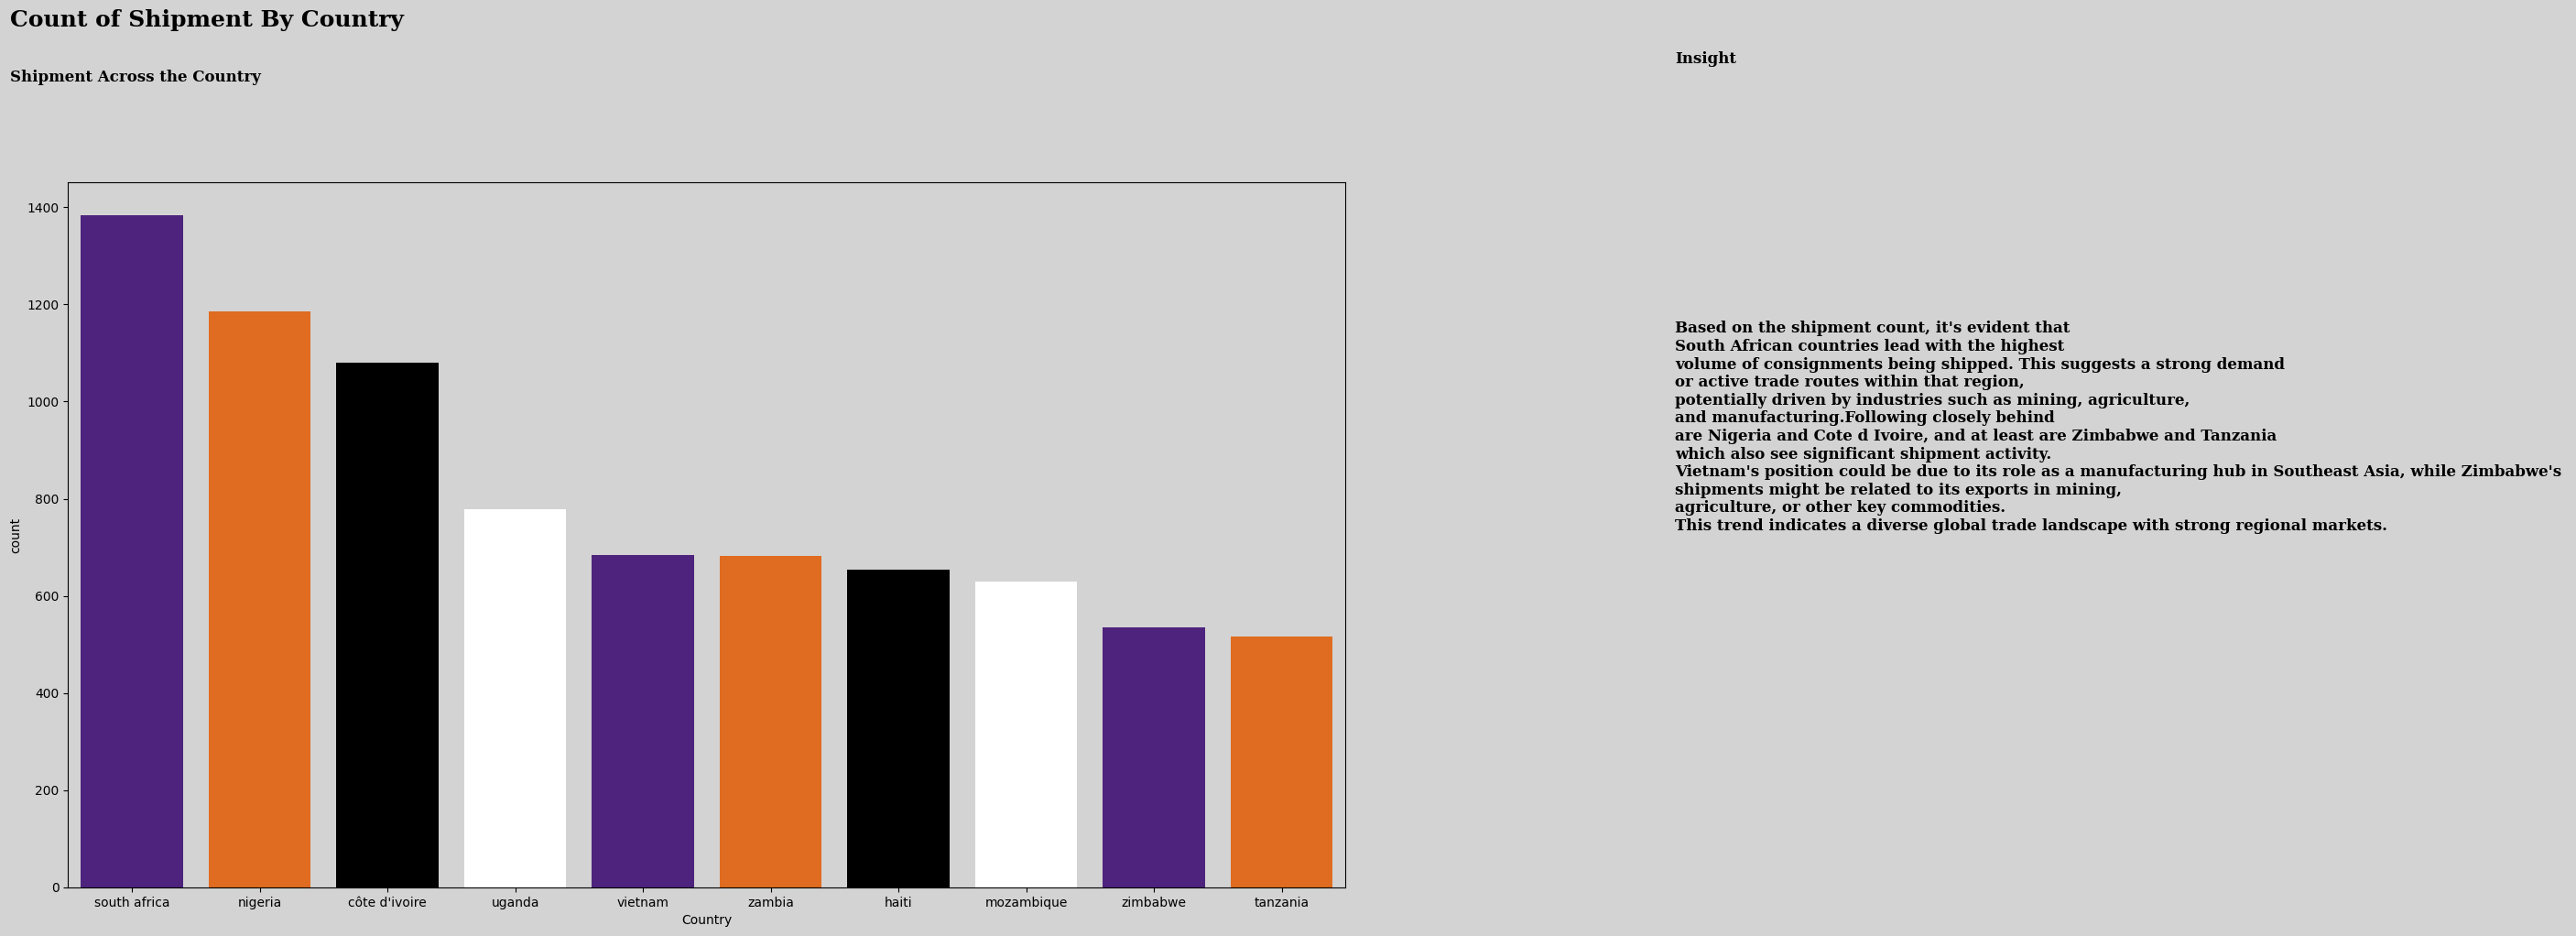

In [14]:
# Chart - 1 visualization code
fig,ax = plt.subplots(1,1,figsize = (18,10))
sns.countplot(x = 'Country', order=fed_ex['Country'].value_counts().nlargest(10).index,data = fed_ex , palette = palette)
apply_chart_styling(ax = ax, fig = fig, title = 'Count of Shipment By Country' , subtitle = 'Shipment Across the Country', insight_text = '''Based on the shipment count, it's evident that 
South African countries lead with the highest 
volume of consignments being shipped. This suggests a strong demand 
or active trade routes within that region, 
potentially driven by industries such as mining, agriculture, 
and manufacturing.Following closely behind 
are Nigeria and Cote d Ivoire, and at least are Zimbabwe and Tanzania
which also see significant shipment activity. 
Vietnam's position could be due to its role as a manufacturing hub in Southeast Asia, while Zimbabwe's 
shipments might be related to its exports in mining, 
agriculture, or other key commodities. 
This trend indicates a diverse global trade landscape with strong regional markets.''')
plt.tight_layout()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'logo.png'

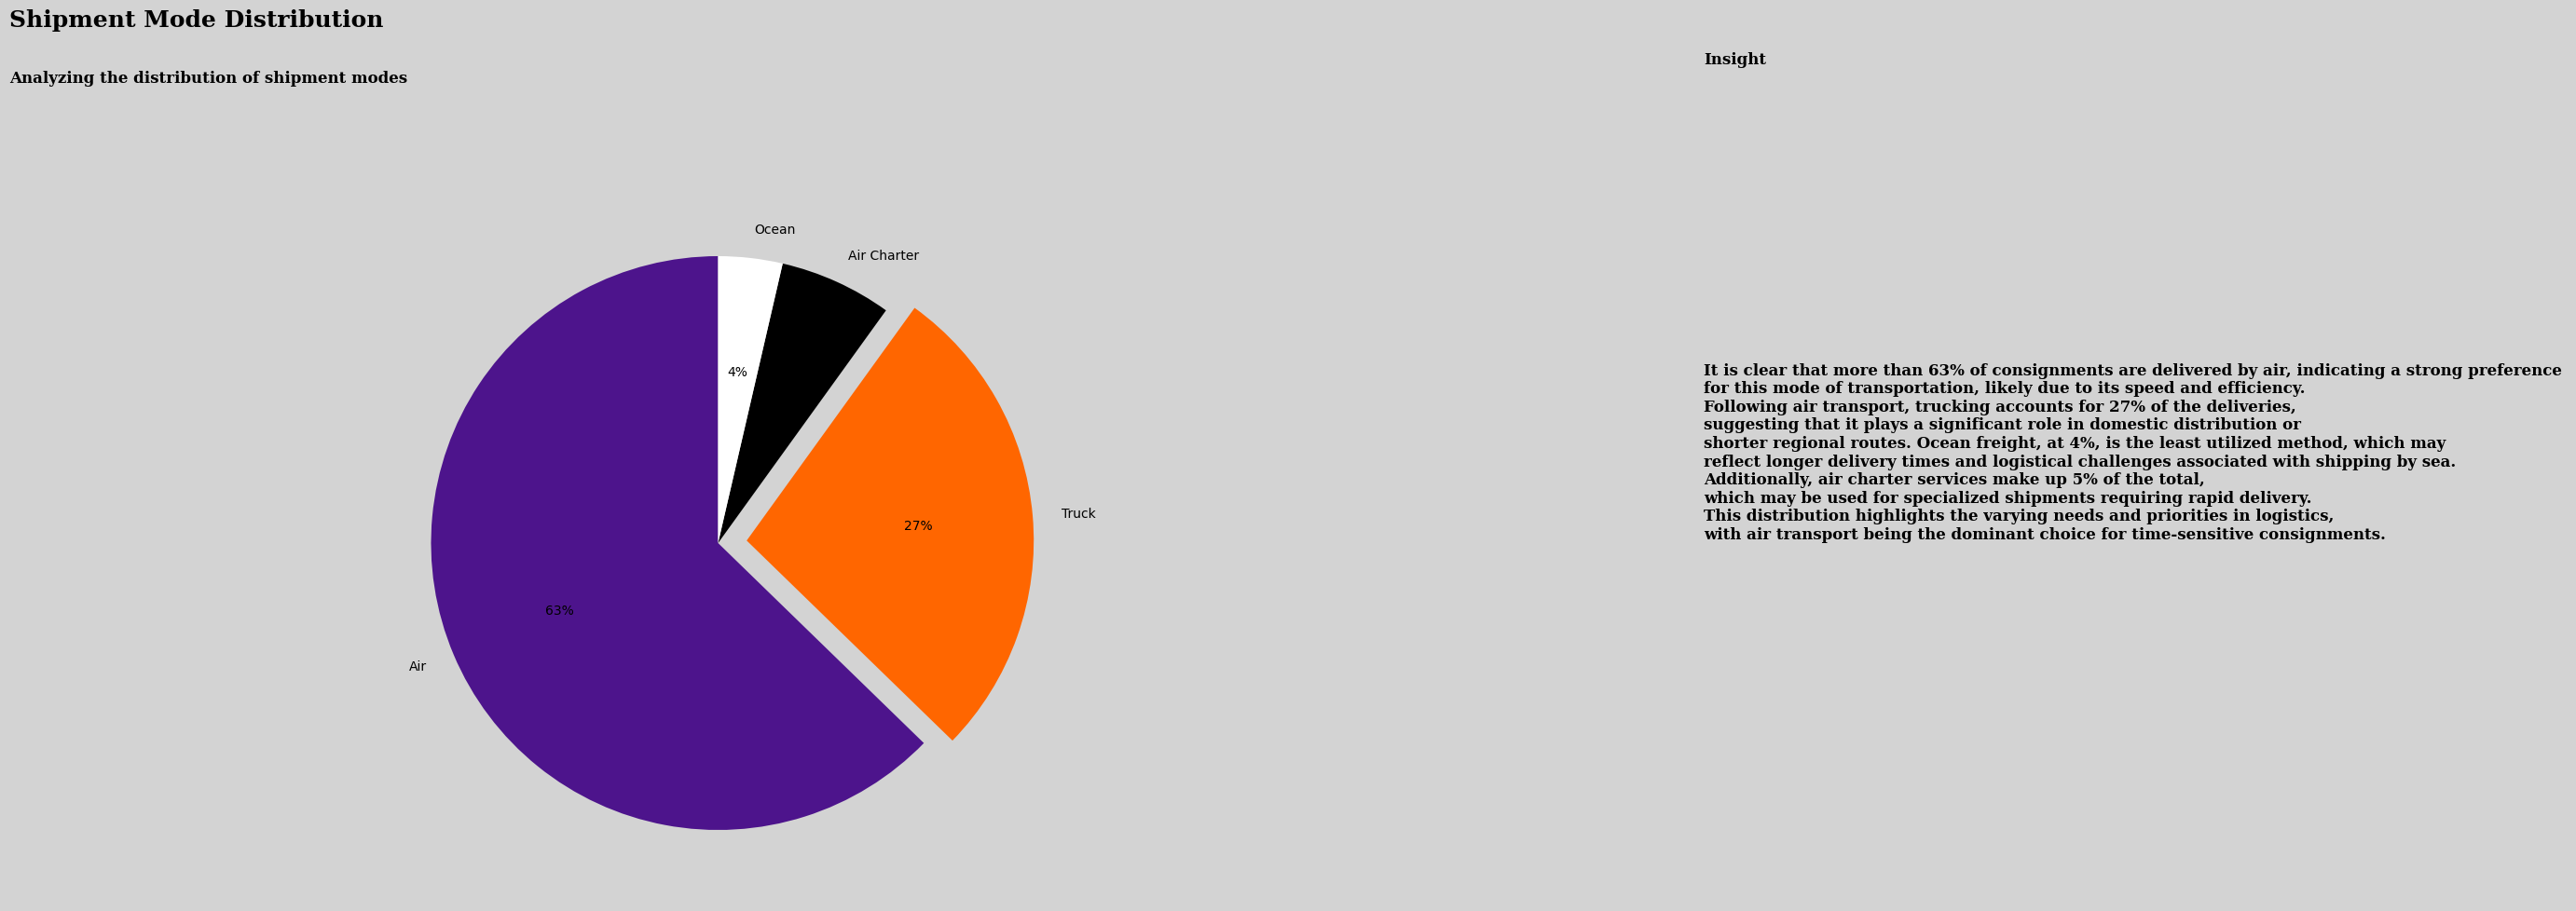

In [16]:
# Chart - 2 visualization code

shipment_mode_counts = fed_ex['Shipment Mode'].value_counts()

# Create the pie chart
fig, ax = plt.subplots(figsize=(18, 10))

explode = [0.1 if i == 1 else 0 for i in range(len(shipment_mode_counts))]  

# Plot the pie chart
ax.pie(shipment_mode_counts, 
       labels=shipment_mode_counts.index, 
       colors=palette, 
       explode=explode, 
       autopct='%.0f%%', 
       startangle=90)

# Apply chart styling
apply_chart_styling(ax=ax, fig=fig, title='Shipment Mode Distribution', subtitle='Analyzing the distribution of shipment modes', insight_text='''It is clear that more than 63% of consignments are delivered by air, indicating a strong preference 
for this mode of transportation, likely due to its speed and efficiency. 
Following air transport, trucking accounts for 27% of the deliveries, 
suggesting that it plays a significant role in domestic distribution or 
shorter regional routes. Ocean freight, at 4%, is the least utilized method, which may 
reflect longer delivery times and logistical challenges associated with shipping by sea. 
Additionally, air charter services make up 5% of the total, 
which may be used for specialized shipments requiring rapid delivery. 
This distribution highlights the varying needs and priorities in logistics,
with air transport being the dominant choice for time-sensitive consignments.''')

# Display the chart
plt.tight_layout()
plt.show()



FileNotFoundError: [Errno 2] No such file or directory: 'logo.png'

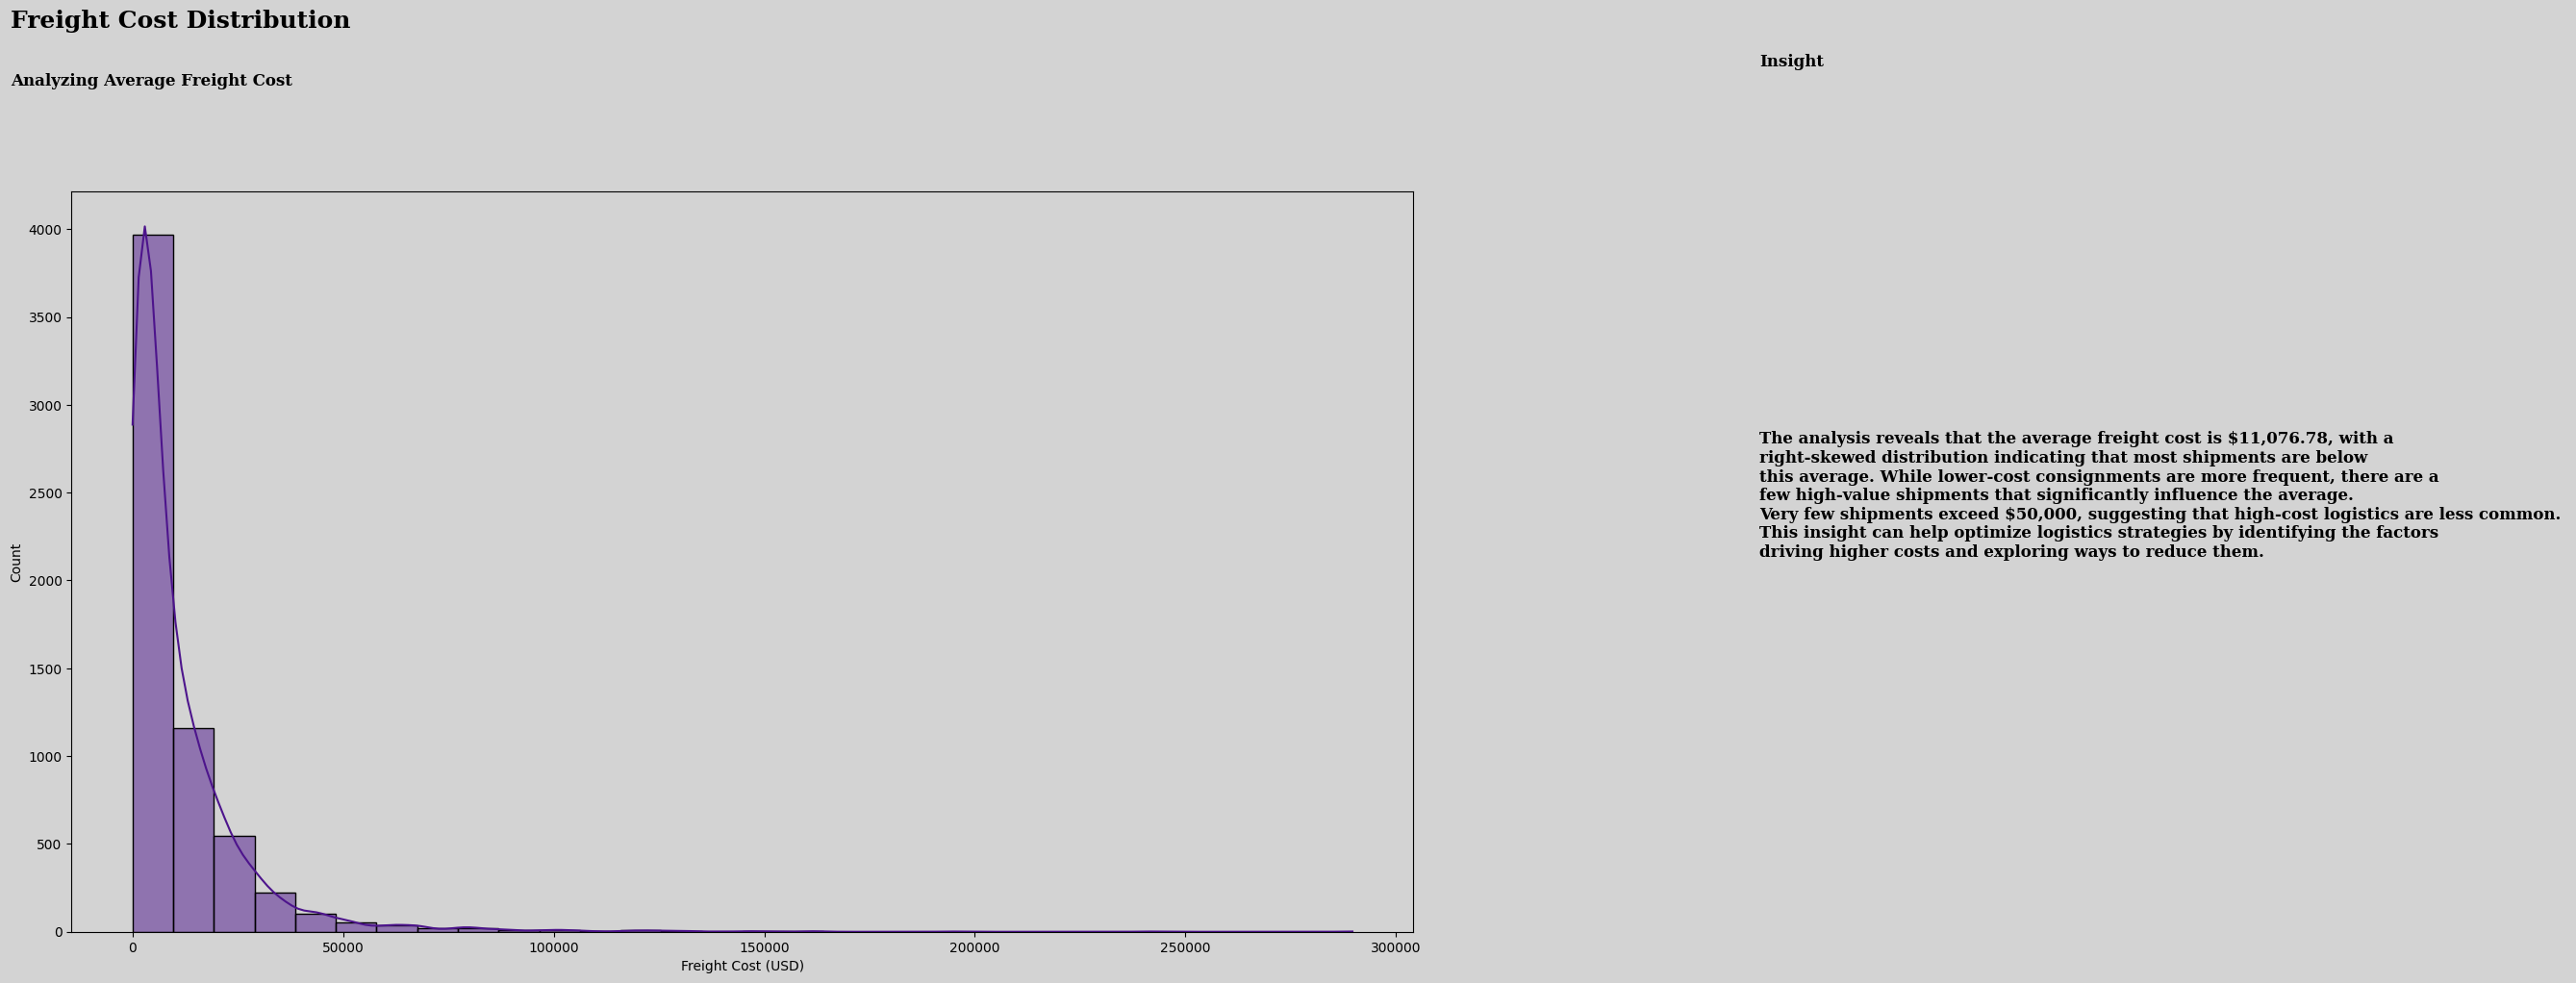

In [17]:
# Chart - 3 visualization code
avg_freight_cost = fed_ex['Freight Cost (USD)'].mean()

# Creating the figure and axis
fig, ax = plt.subplots(1, 1, figsize=(18, 10))

# Plotting the histogram of the Freight Cost (USD)
sns.histplot(x='Freight Cost (USD)', data=fed_ex, ax=ax, kde=True, bins=30, color='#4d148c')

# Adding chart styling
apply_chart_styling(ax=ax, fig=fig, title='Freight Cost Distribution', 
                    subtitle="Analyzing Average Freight Cost", 
                    insight_text=
'''The analysis reveals that the average freight cost is $11,076.78, with a 
right-skewed distribution indicating that most shipments are below 
this average. While lower-cost consignments are more frequent, there are a 
few high-value shipments that significantly influence the average. 
Very few shipments exceed $50,000, suggesting that high-cost logistics are less common. 
This insight can help optimize logistics strategies by identifying the factors 
driving higher costs and exploring ways to reduce them. ''')

# Adjusting layout
plt.tight_layout()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'logo.png'

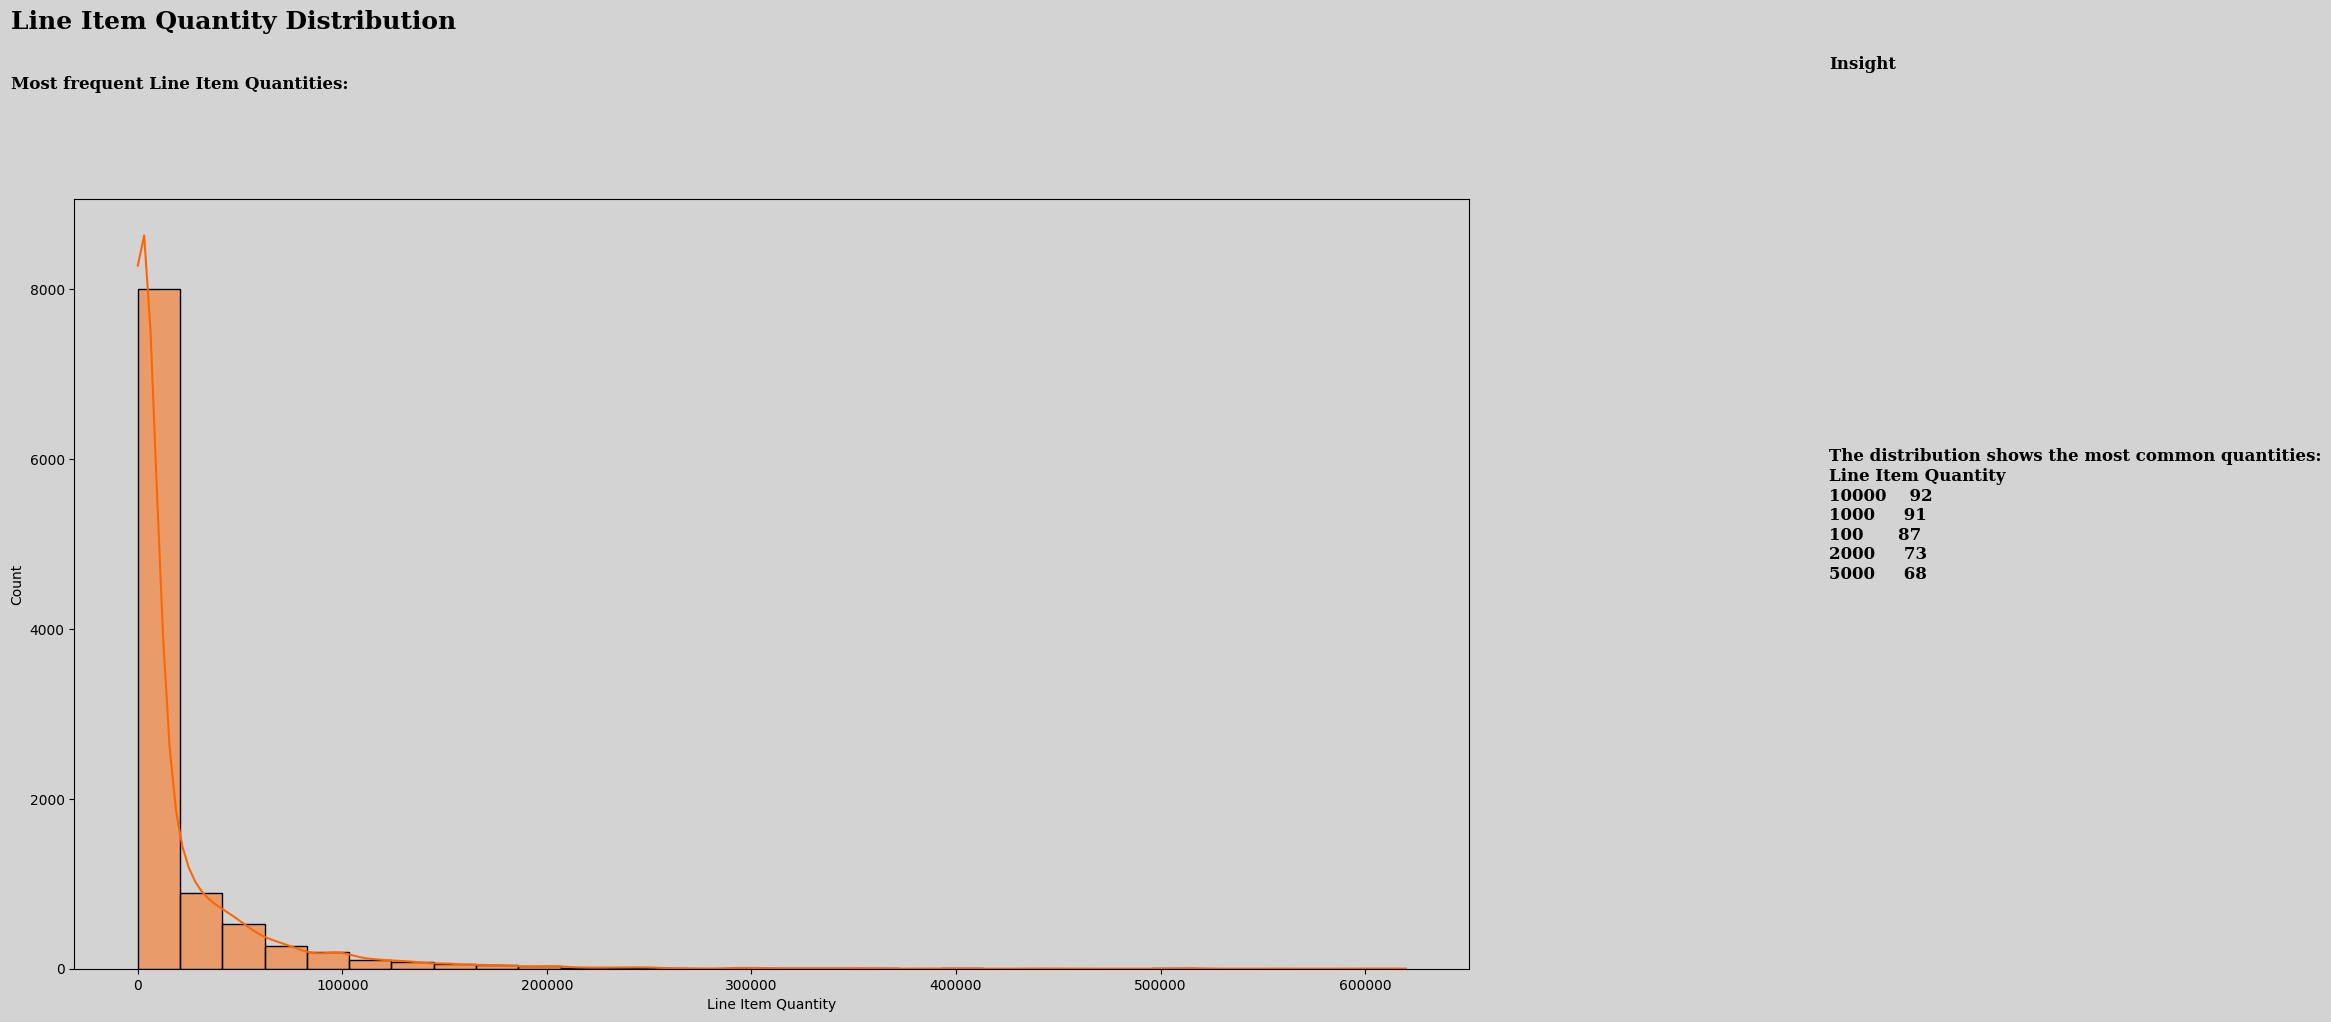

In [18]:
# Chart - 4 visualization code
# Counting the frequency of each Line Item Quantity value
count_line_quantity = fed_ex['Line Item Quantity'].value_counts()

# Creating the figure and axis
fig, ax = plt.subplots(1, 1, figsize=(18, 10))

# Plotting the histogram of the Line Item Quantity
sns.histplot(x='Line Item Quantity', data=fed_ex, ax=ax, kde=True, bins=30, color='#ff6600')

# Adding chart styling
apply_chart_styling(ax=ax, fig=fig, title='Line Item Quantity Distribution', 
                    subtitle="Most frequent Line Item Quantities:", 
                    insight_text=f'The distribution shows the most common quantities:\n{count_line_quantity.head(5).to_string()}')

# Adjusting layout
plt.tight_layout()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'logo.png'

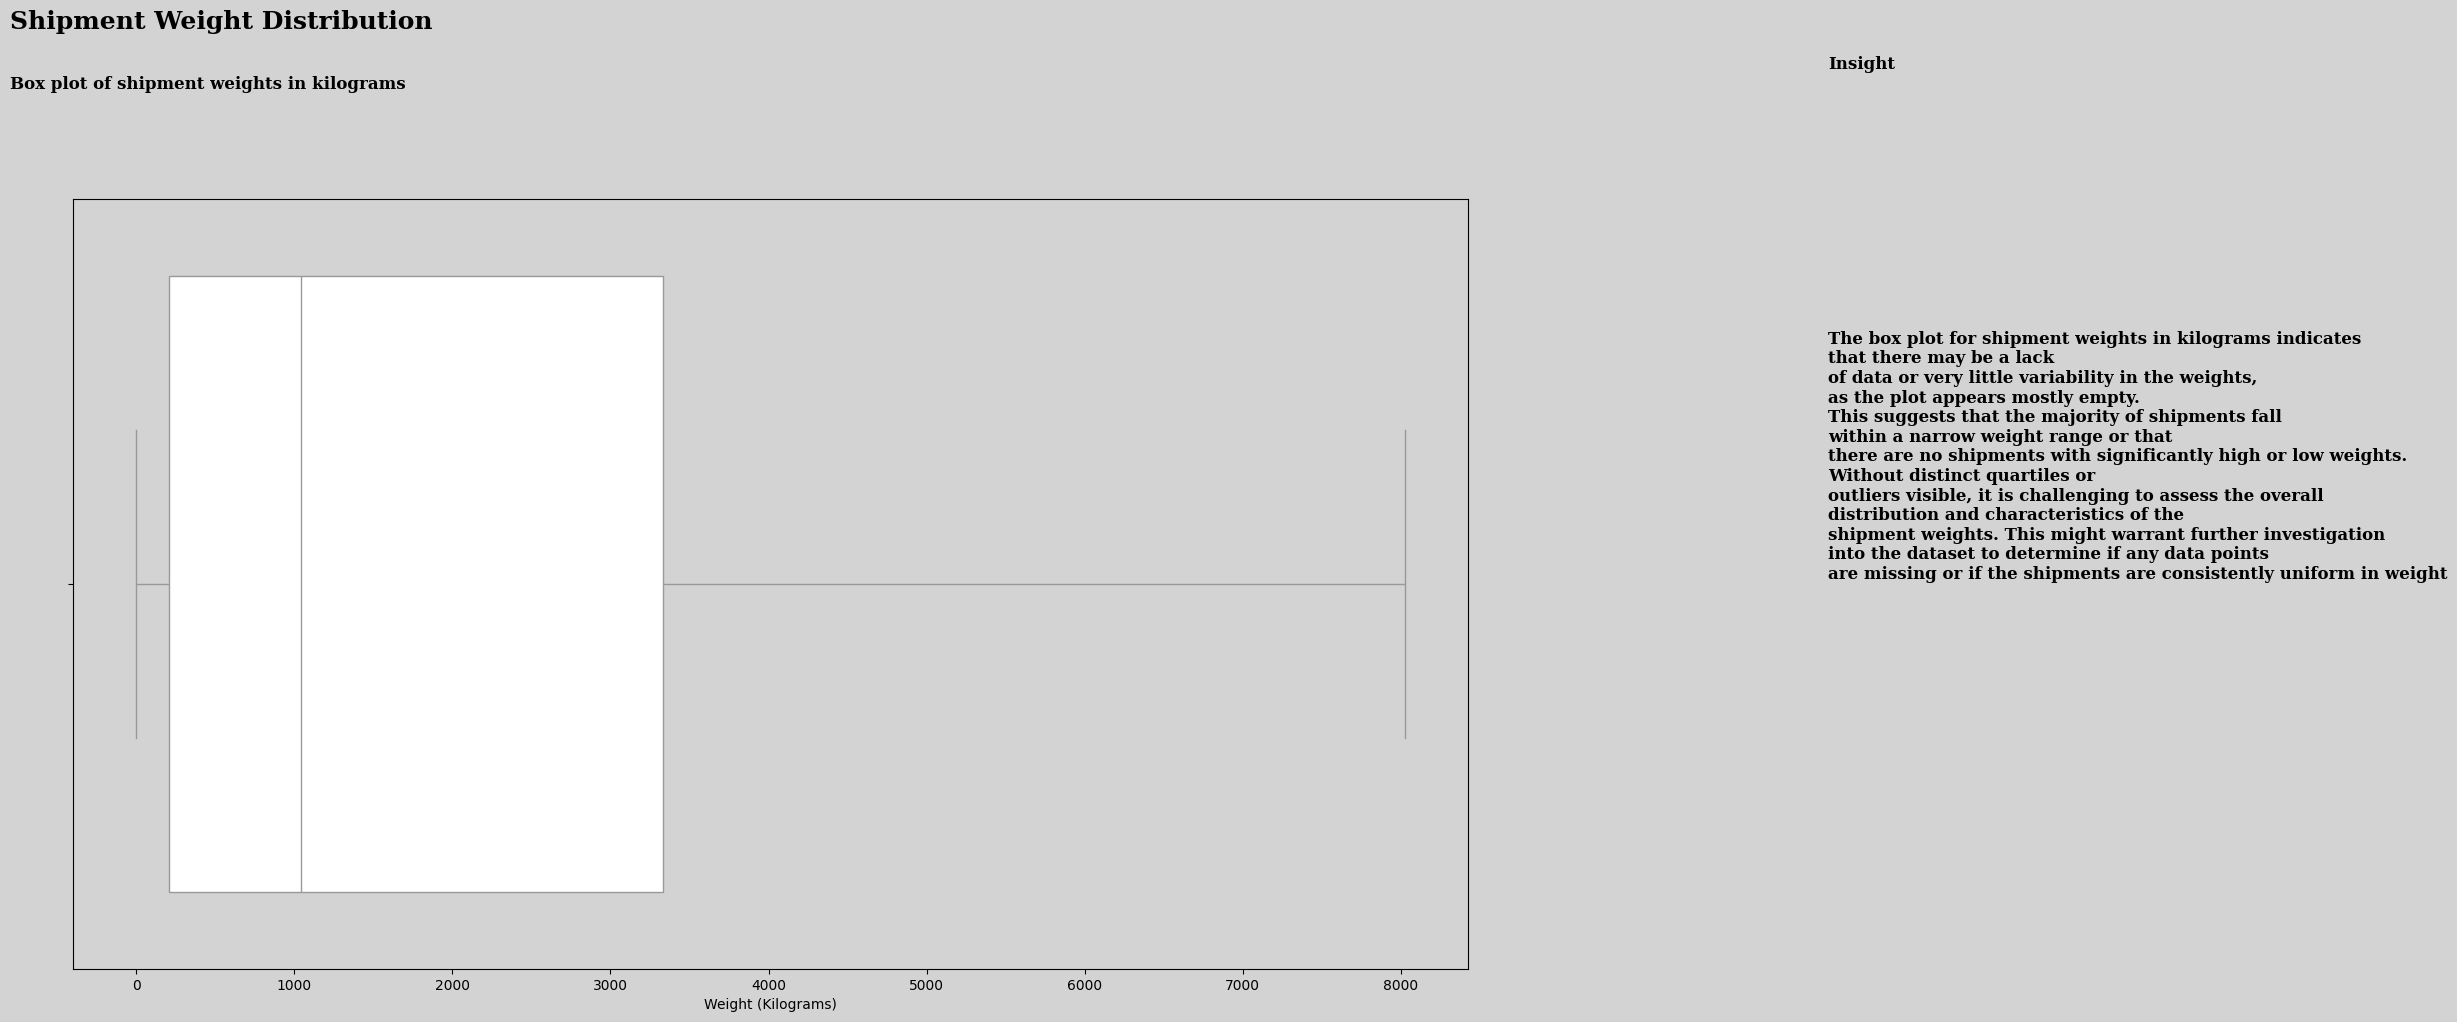

In [19]:
# Chart - 5 visualization code
fig, ax = plt.subplots(1, 1, figsize=(18, 10))

# Plotting the boxplot of the shipment weights
sns.boxplot(x='Weight (Kilograms)', data=fed_ex, ax=ax, color='#ffffff',showfliers = False)

# Adding chart styling
apply_chart_styling(ax=ax, fig=fig, title='Shipment Weight Distribution', subtitle='Box plot of shipment weights in kilograms',insight_text=
'''The box plot for shipment weights in kilograms indicates 
that there may be a lack 
of data or very little variability in the weights, 
as the plot appears mostly empty. 
This suggests that the majority of shipments fall 
within a narrow weight range or that 
there are no shipments with significantly high or low weights. 
Without distinct quartiles or 
outliers visible, it is challenging to assess the overall 
distribution and characteristics of the 
shipment weights. This might warrant further investigation 
into the dataset to determine if any data points 
are missing or if the shipments are consistently uniform in weight''')

# Adjusting layout
plt.tight_layout()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'logo.png'

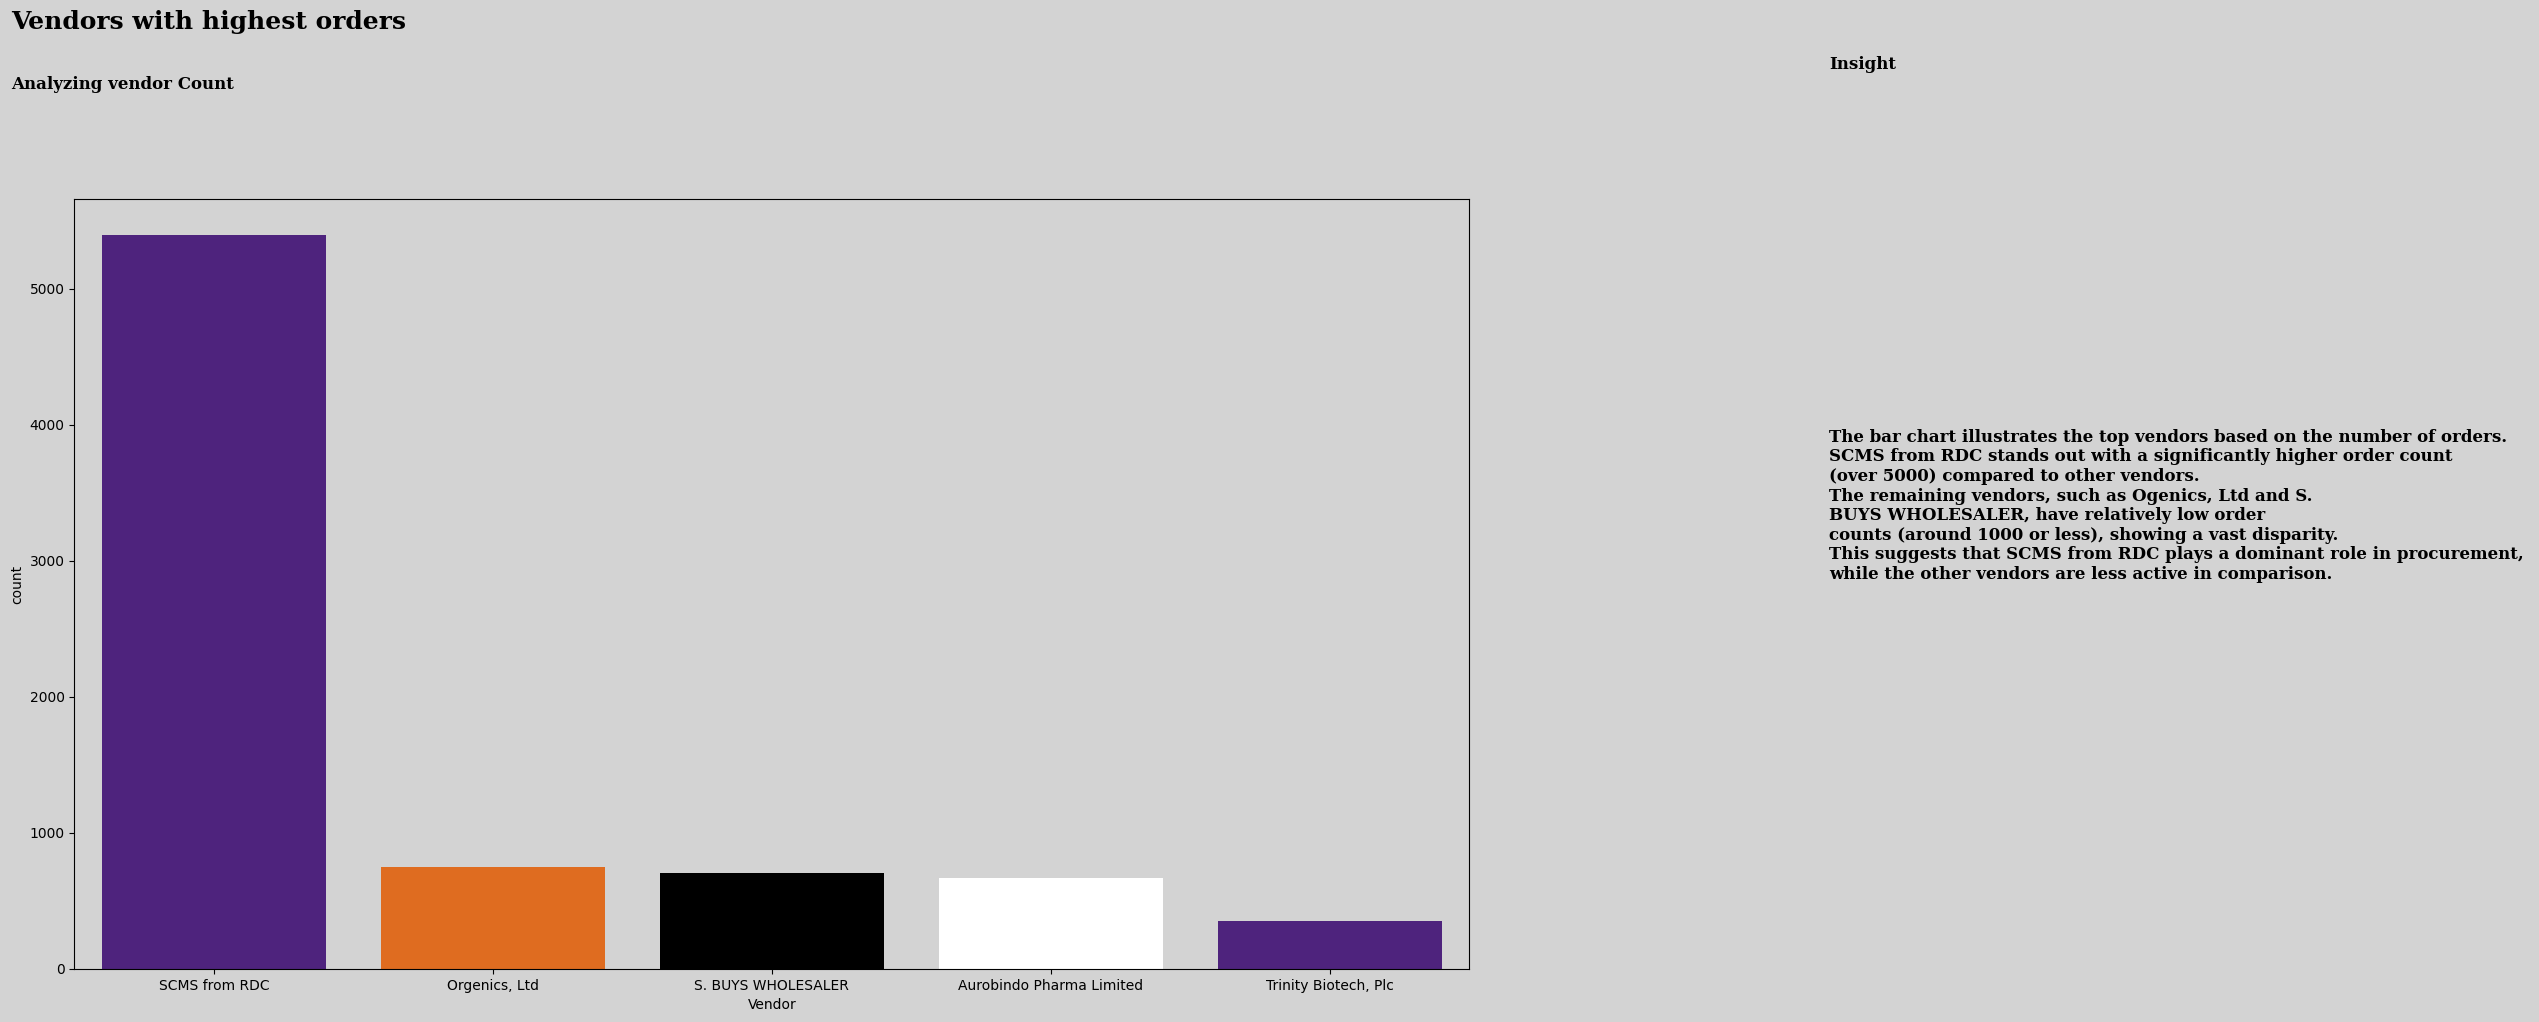

In [20]:
# Chart - 6 visualization code
# Setting up the plot
fig, ax = plt.subplots(figsize=(18, 10))

sns.countplot(x = 'Vendor' , order=fed_ex['Vendor'].value_counts().nlargest(5).index,data = fed_ex , palette = palette)
# Applying your defined chart styling
apply_chart_styling(ax=ax, fig=fig, title='Vendors with highest orders', subtitle='Analyzing vendor Count', insight_text='''The bar chart illustrates the top vendors based on the number of orders.
SCMS from RDC stands out with a significantly higher order count
(over 5000) compared to other vendors. 
The remaining vendors, such as Ogenics, Ltd and S. 
BUYS WHOLESALER, have relatively low order 
counts (around 1000 or less), showing a vast disparity. 
This suggests that SCMS from RDC plays a dominant role in procurement, 
while the other vendors are less active in comparison.''')

# Tight layout for better spacing
plt.tight_layout()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'logo.png'

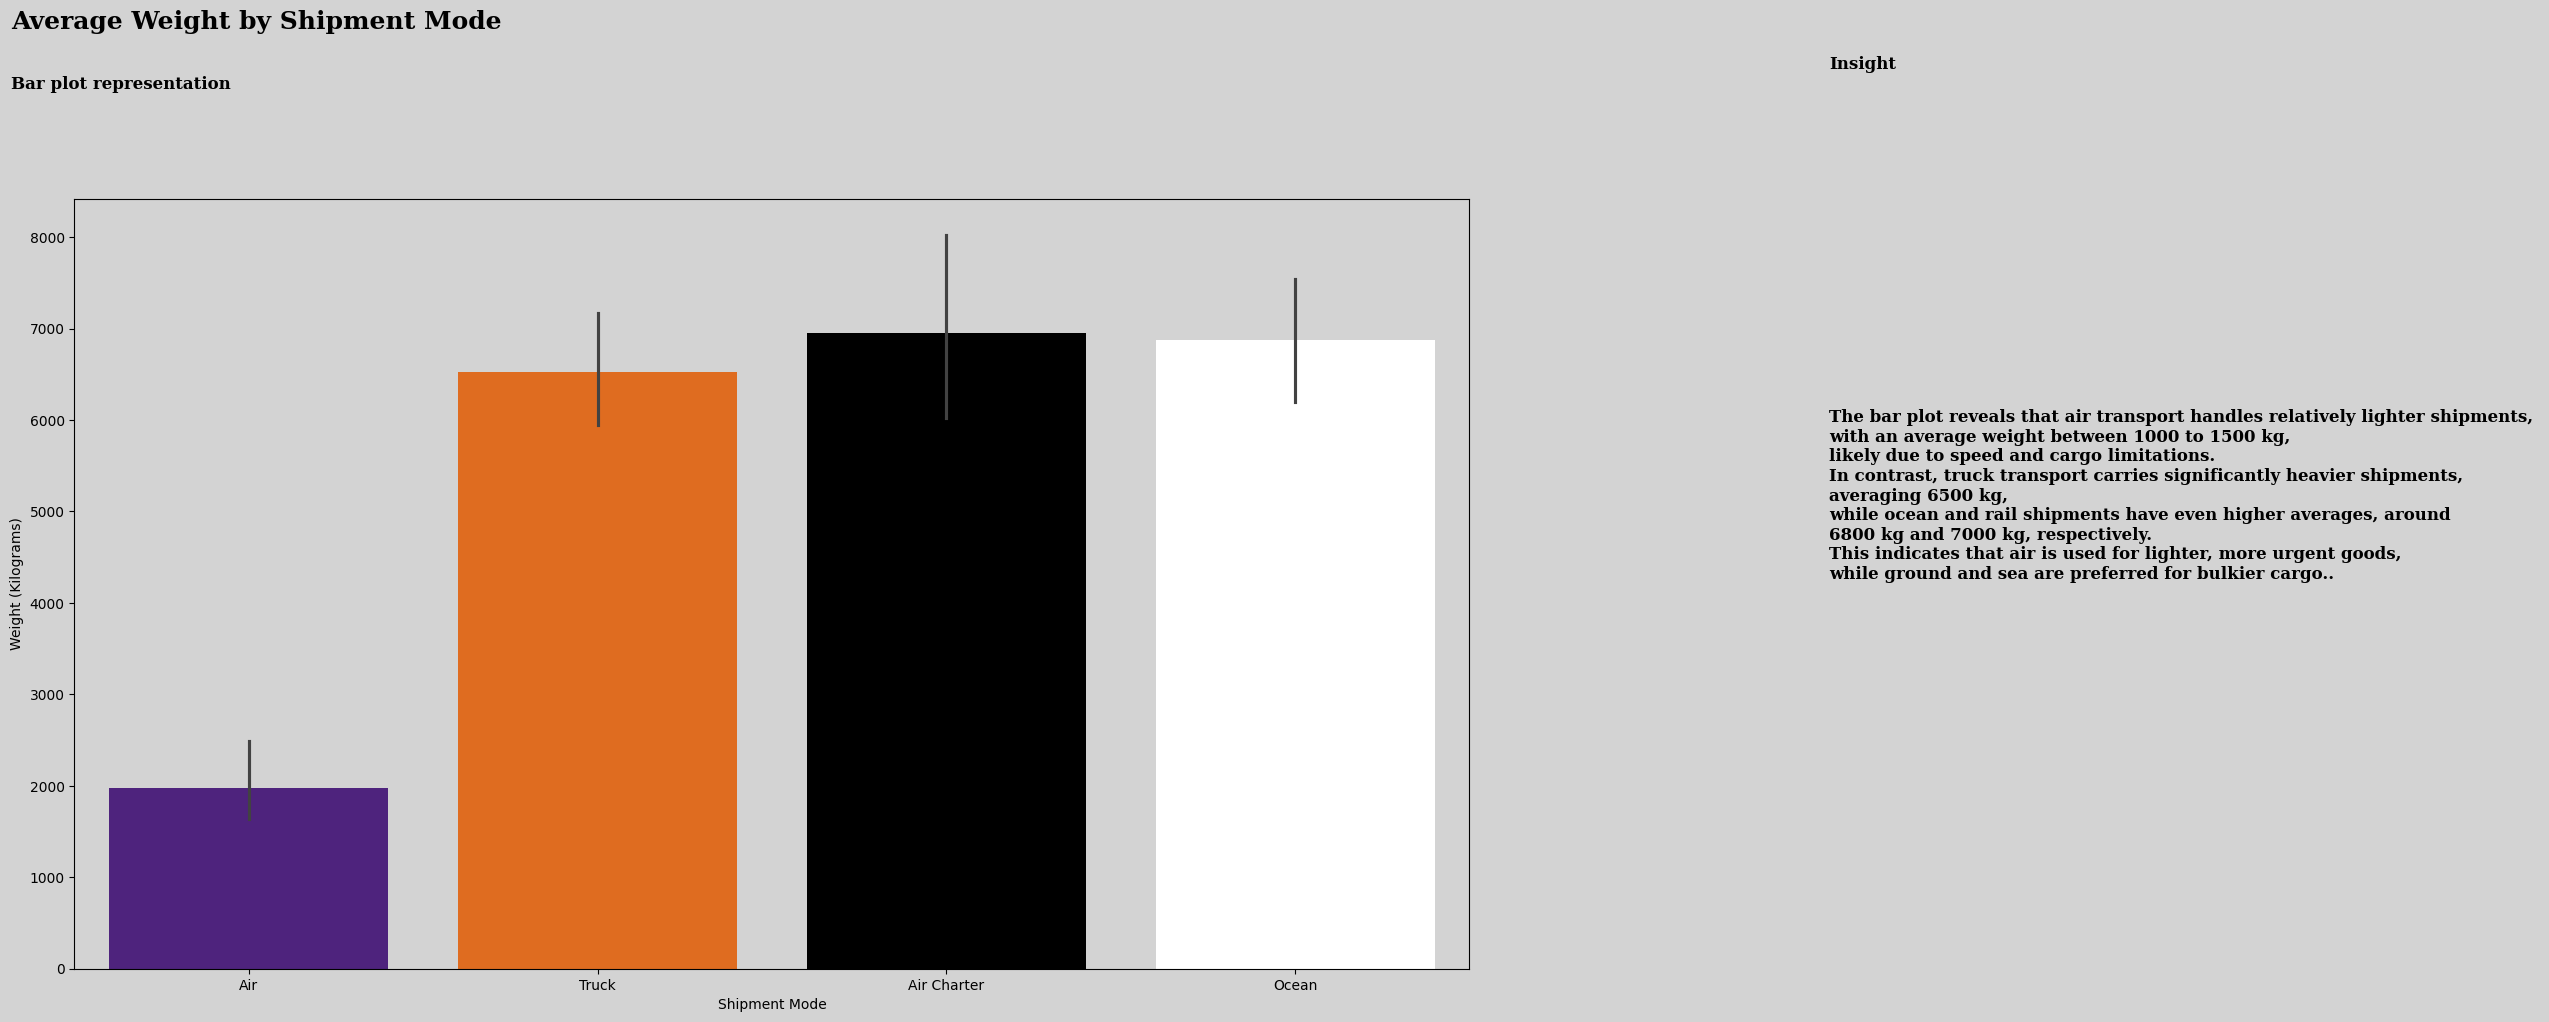

In [21]:
# Chart - 11 visualization code
fig, ax = plt.subplots(1, 1, figsize=(18, 10))
sns.barplot(data=fed_ex, x='Shipment Mode', y='Weight (Kilograms)', estimator='mean', palette=palette)
apply_chart_styling(ax=ax, fig=fig, title='Average Weight by Shipment Mode', subtitle='Bar plot representation', insight_text='''The bar plot reveals that air transport handles relatively lighter shipments, 
with an average weight between 1000 to 1500 kg, 
likely due to speed and cargo limitations. 
In contrast, truck transport carries significantly heavier shipments, 
averaging 6500 kg, 
while ocean and rail shipments have even higher averages, around 
6800 kg and 7000 kg, respectively. 
This indicates that air is used for lighter, more urgent goods, 
while ground and sea are preferred for bulkier cargo..''')
plt.tight_layout()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'logo.png'

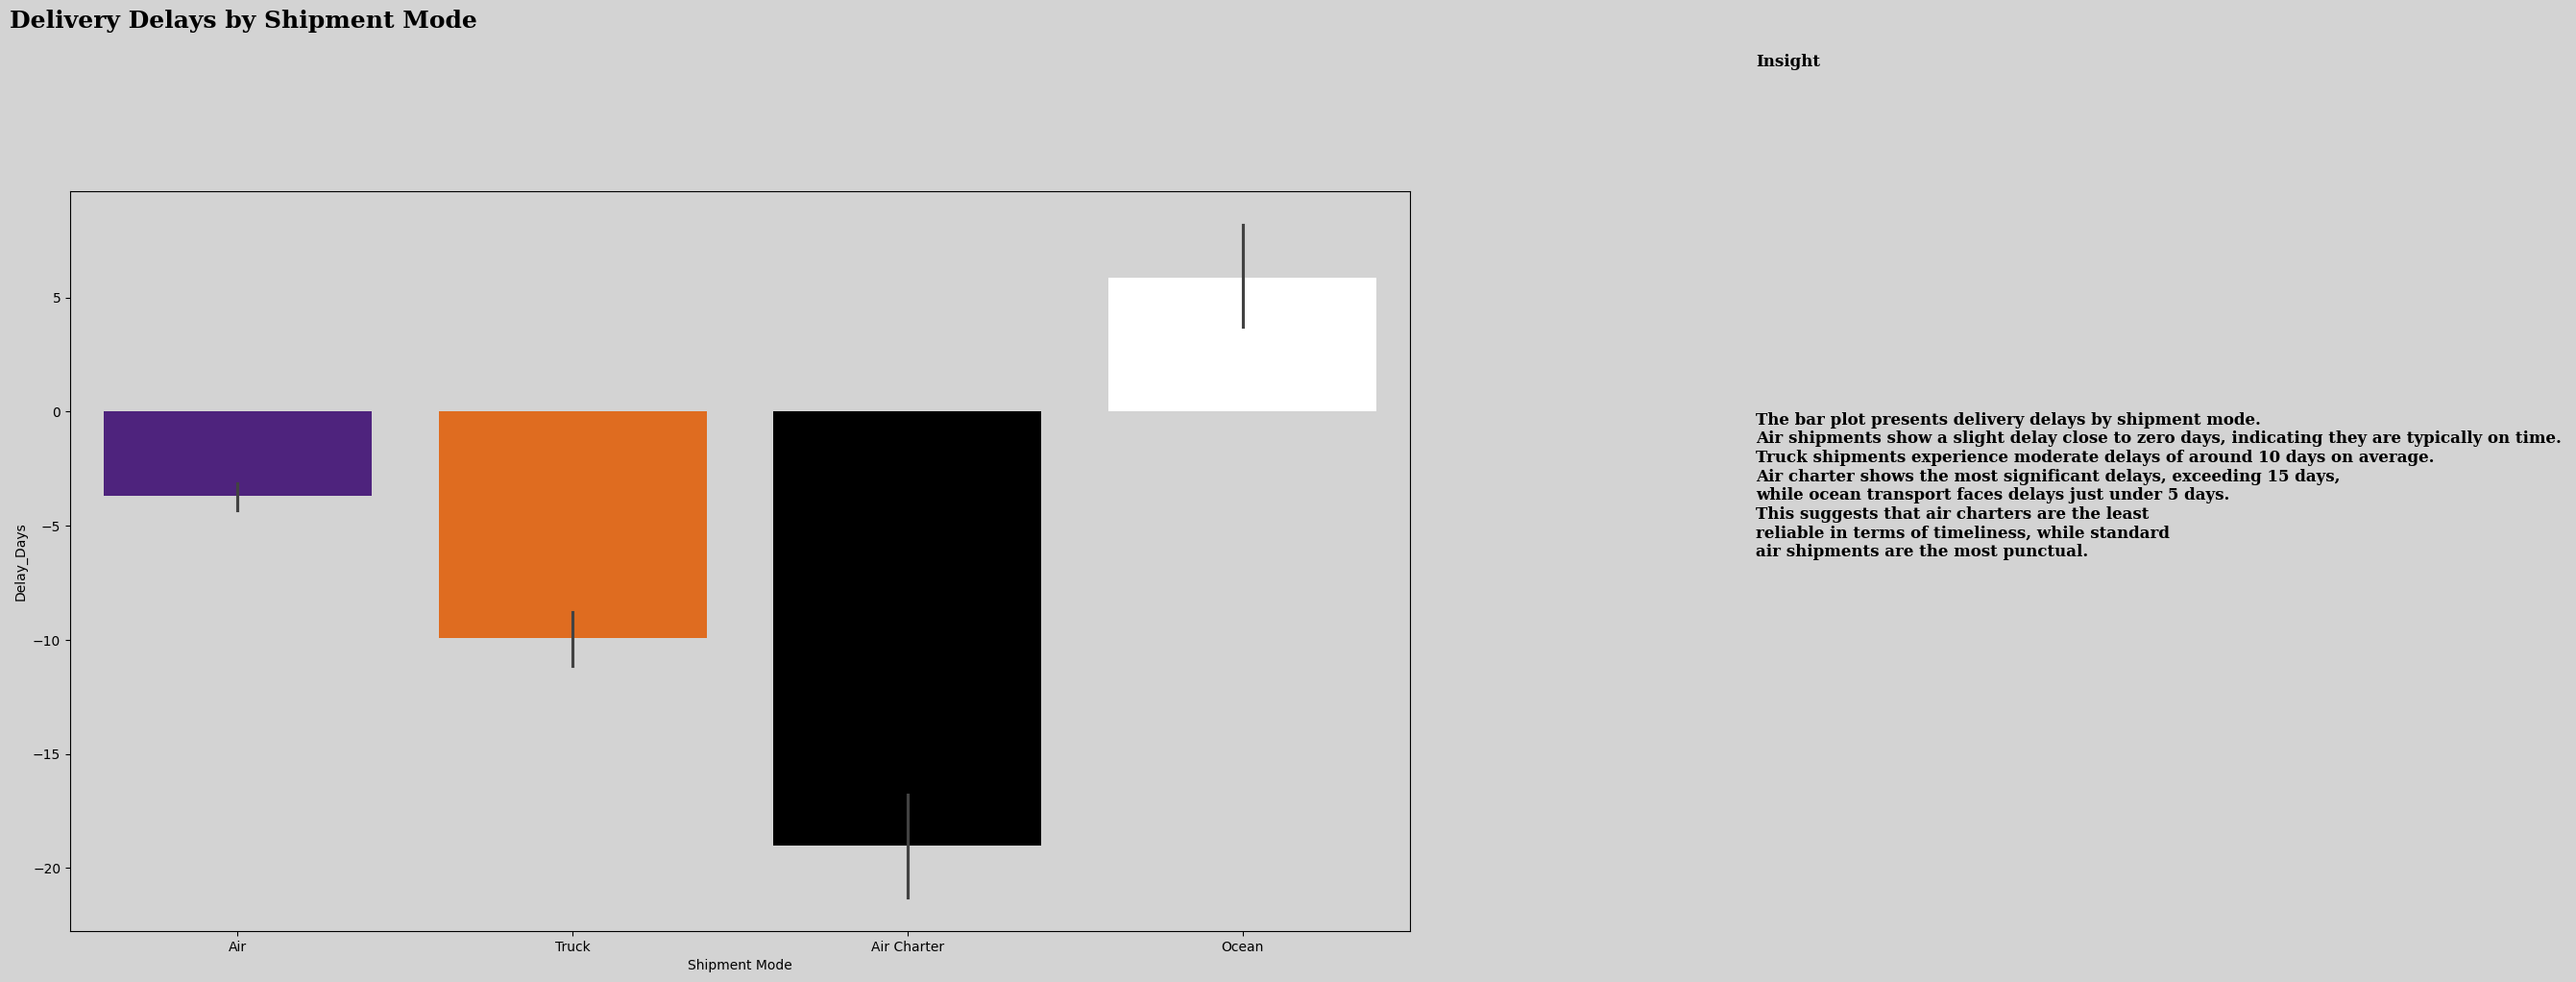

In [22]:
# Chart - 7 visualization code
fed_ex['Delay_Days'] = (fed_ex['Delivered to Client Date'] - fed_ex['Scheduled Delivery Date']).dt.days
fig,ax = plt.subplots(1,1,figsize= (18,10))
sns.barplot(x='Shipment Mode', y='Delay_Days', data=fed_ex,palette = palette)
apply_chart_styling(ax = ax ,fig = fig, title = 'Delivery Delays by Shipment Mode',subtitle = '',insight_text = '''The bar plot presents delivery delays by shipment mode. 
Air shipments show a slight delay close to zero days, indicating they are typically on time. 
Truck shipments experience moderate delays of around 10 days on average. 
Air charter shows the most significant delays, exceeding 15 days, 
while ocean transport faces delays just under 5 days. 
This suggests that air charters are the least 
reliable in terms of timeliness, while standard 
air shipments are the most punctual. ''')
plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'logo.png'

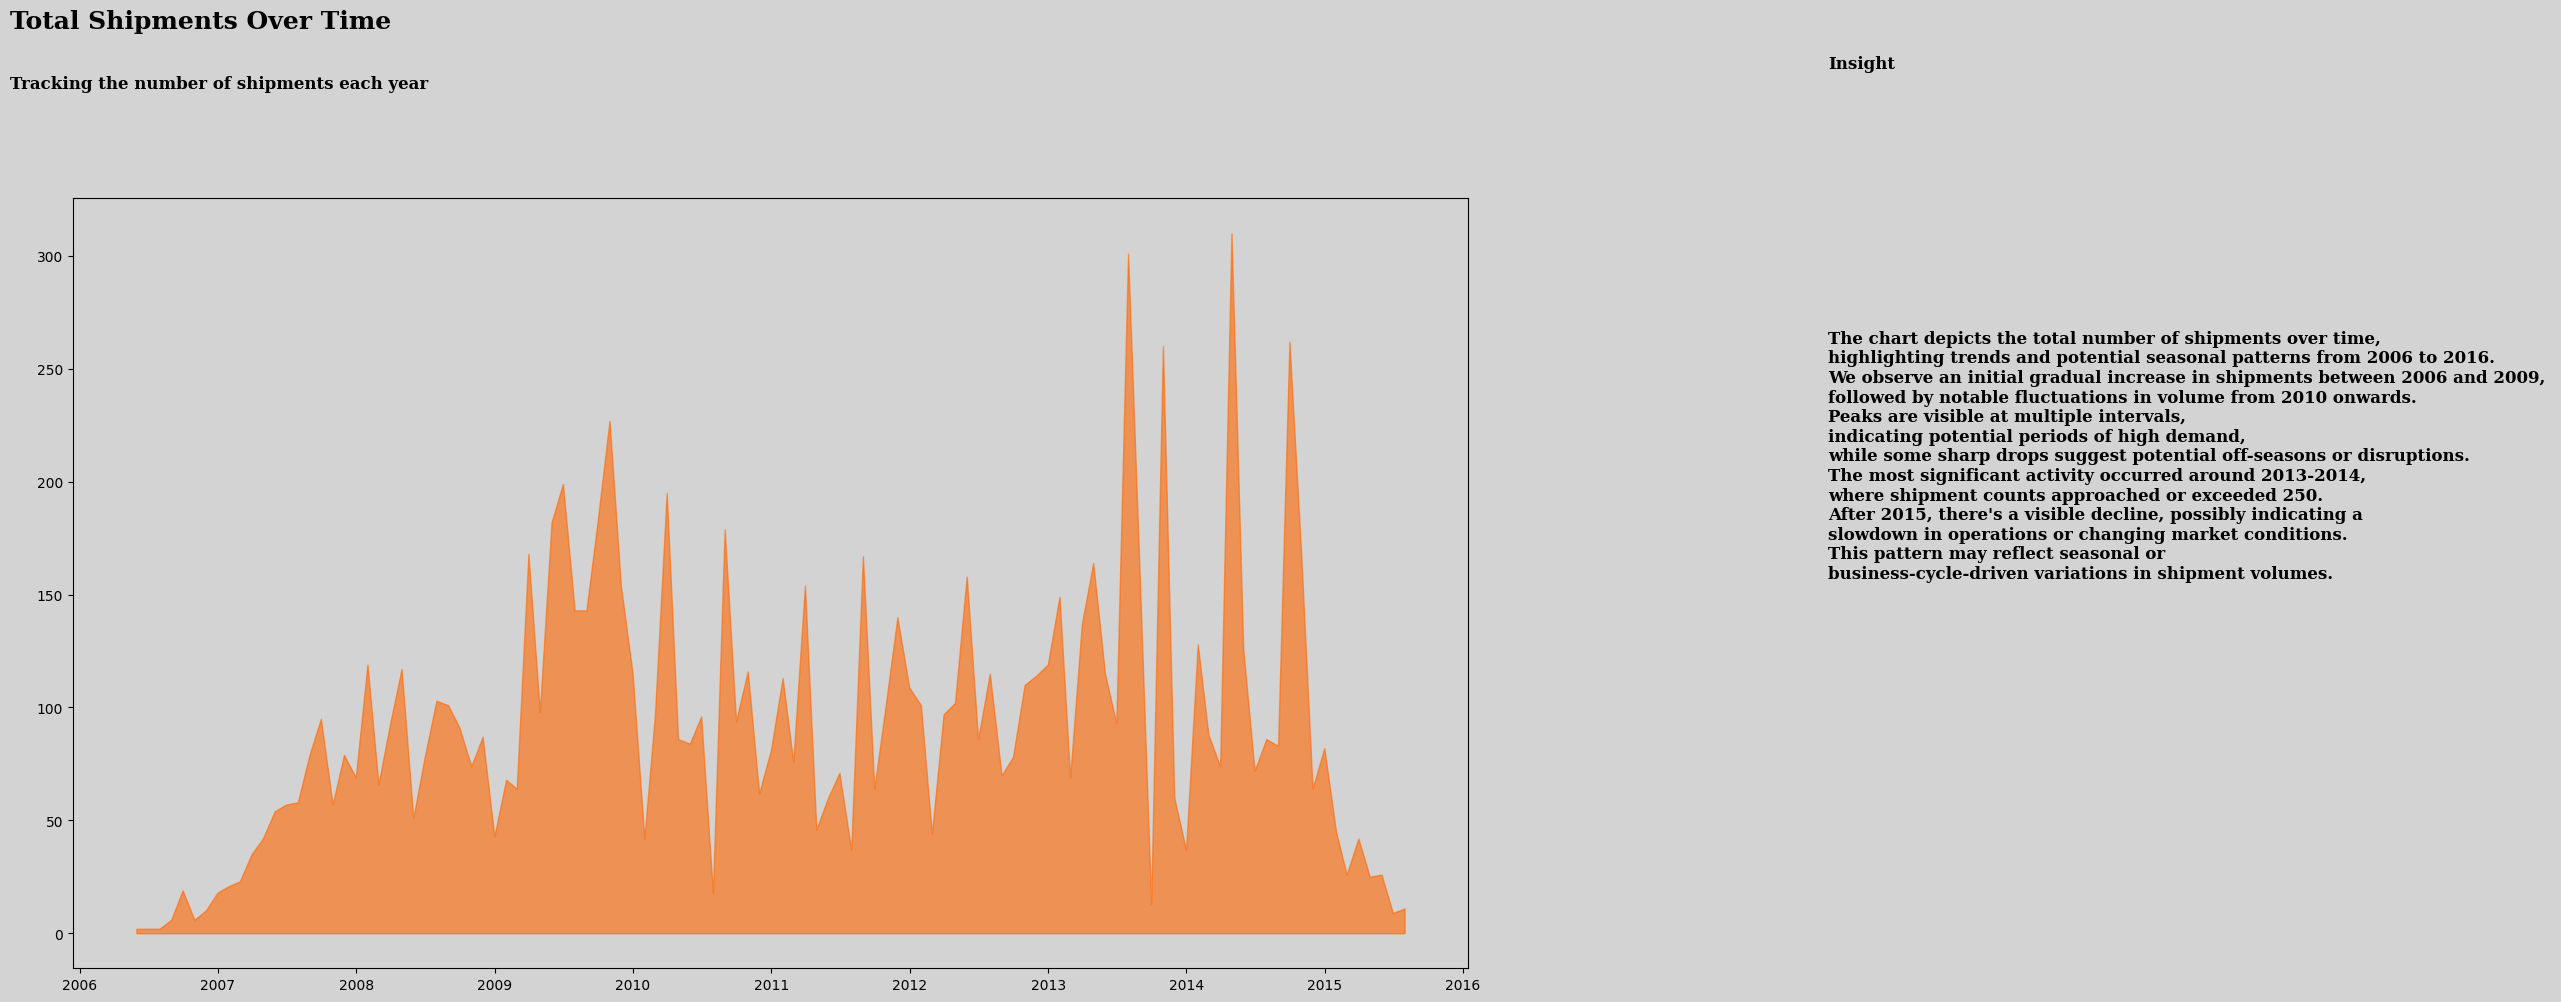

In [23]:
fed_ex['Shipment_Date'] = fed_ex['PQ First Sent to Client Date'].fillna(fed_ex['Scheduled Delivery Date'])
shipments_over_time = fed_ex.resample('M', on='Shipment_Date').size()

# Create figure and axes
fig, ax = plt.subplots(figsize=(18, 10))

# Convert to area chart using fill_between
ax.fill_between(shipments_over_time.index, shipments_over_time.values, color='#ff6600', alpha=0.6)

# Applying your defined chart styling
apply_chart_styling(ax=ax, fig=fig, title='Total Shipments Over Time', subtitle='Tracking the number of shipments each year',insight_text='''The chart depicts the total number of shipments over time, 
highlighting trends and potential seasonal patterns from 2006 to 2016. 
We observe an initial gradual increase in shipments between 2006 and 2009, 
followed by notable fluctuations in volume from 2010 onwards. 
Peaks are visible at multiple intervals, 
indicating potential periods of high demand, 
while some sharp drops suggest potential off-seasons or disruptions. 
The most significant activity occurred around 2013-2014, 
where shipment counts approached or exceeded 250. 
After 2015, there's a visible decline, possibly indicating a 
slowdown in operations or changing market conditions. 
This pattern may reflect seasonal or 
business-cycle-driven variations in shipment volumes.''')

# Tight layout for better spacing
plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'logo.png'

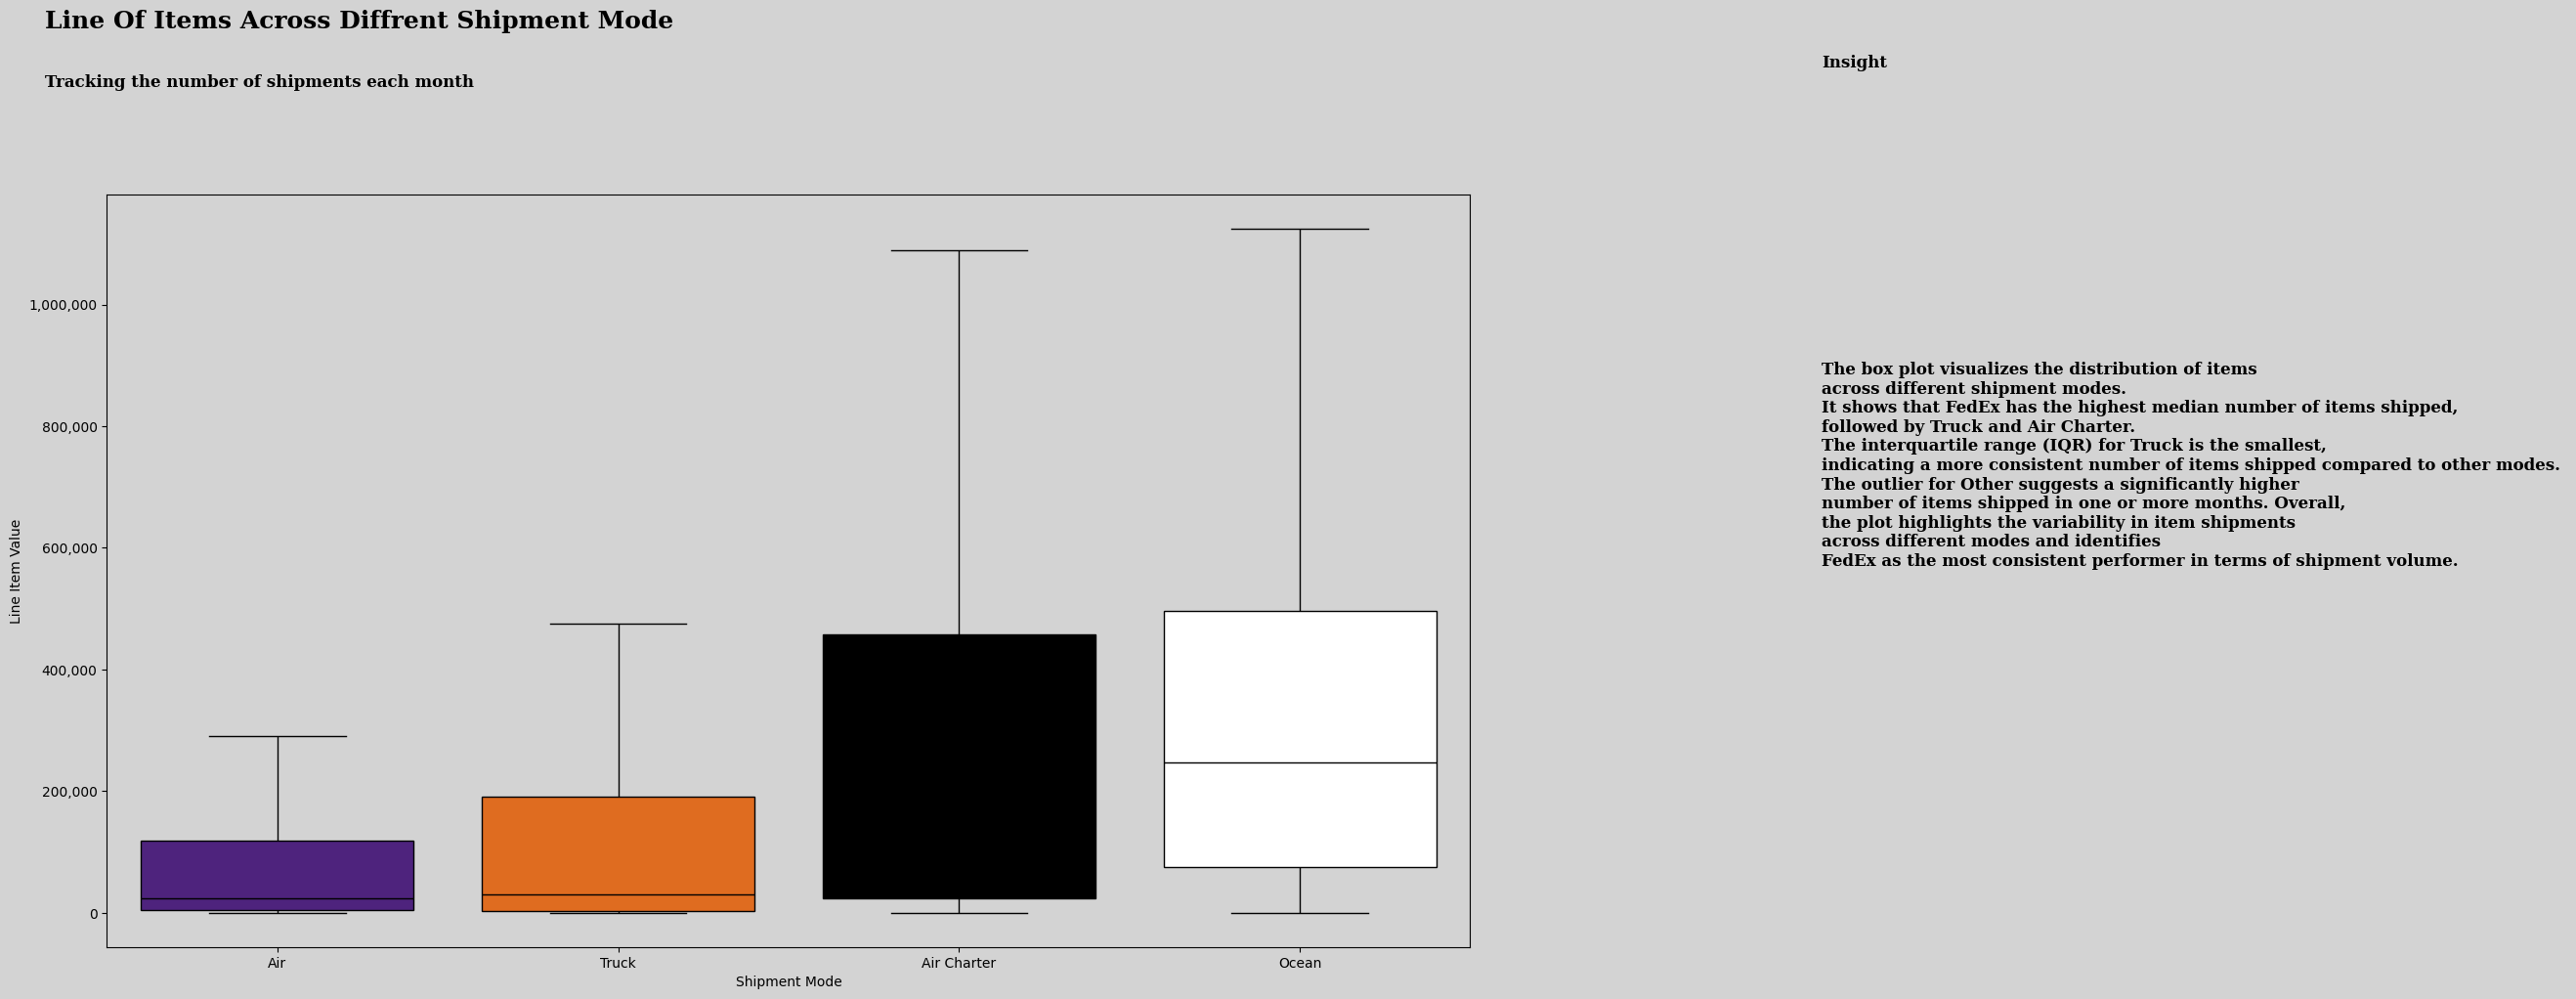

In [24]:
fig, ax = plt.subplots(figsize=(18, 10))
sns.boxplot(x = 'Shipment Mode' , y = 'Line Item Value',data = fed_ex,palette = palette,showfliers = False)
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
# Applying your defined chart styling
apply_chart_styling(ax=ax, fig=fig, title='Line Of Items Across Diffrent Shipment Mode', subtitle='Tracking the number of shipments each month', insight_text='''The box plot visualizes the distribution of items 
across different shipment modes. 
It shows that FedEx has the highest median number of items shipped, 
followed by Truck and Air Charter. 
The interquartile range (IQR) for Truck is the smallest, 
indicating a more consistent number of items shipped compared to other modes. 
The outlier for Other suggests a significantly higher 
number of items shipped in one or more months. Overall, 
the plot highlights the variability in item shipments 
across different modes and identifies 
FedEx as the most consistent performer in terms of shipment volume.''')

# Tight layout for better spacing
plt.tight_layout()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'logo.png'

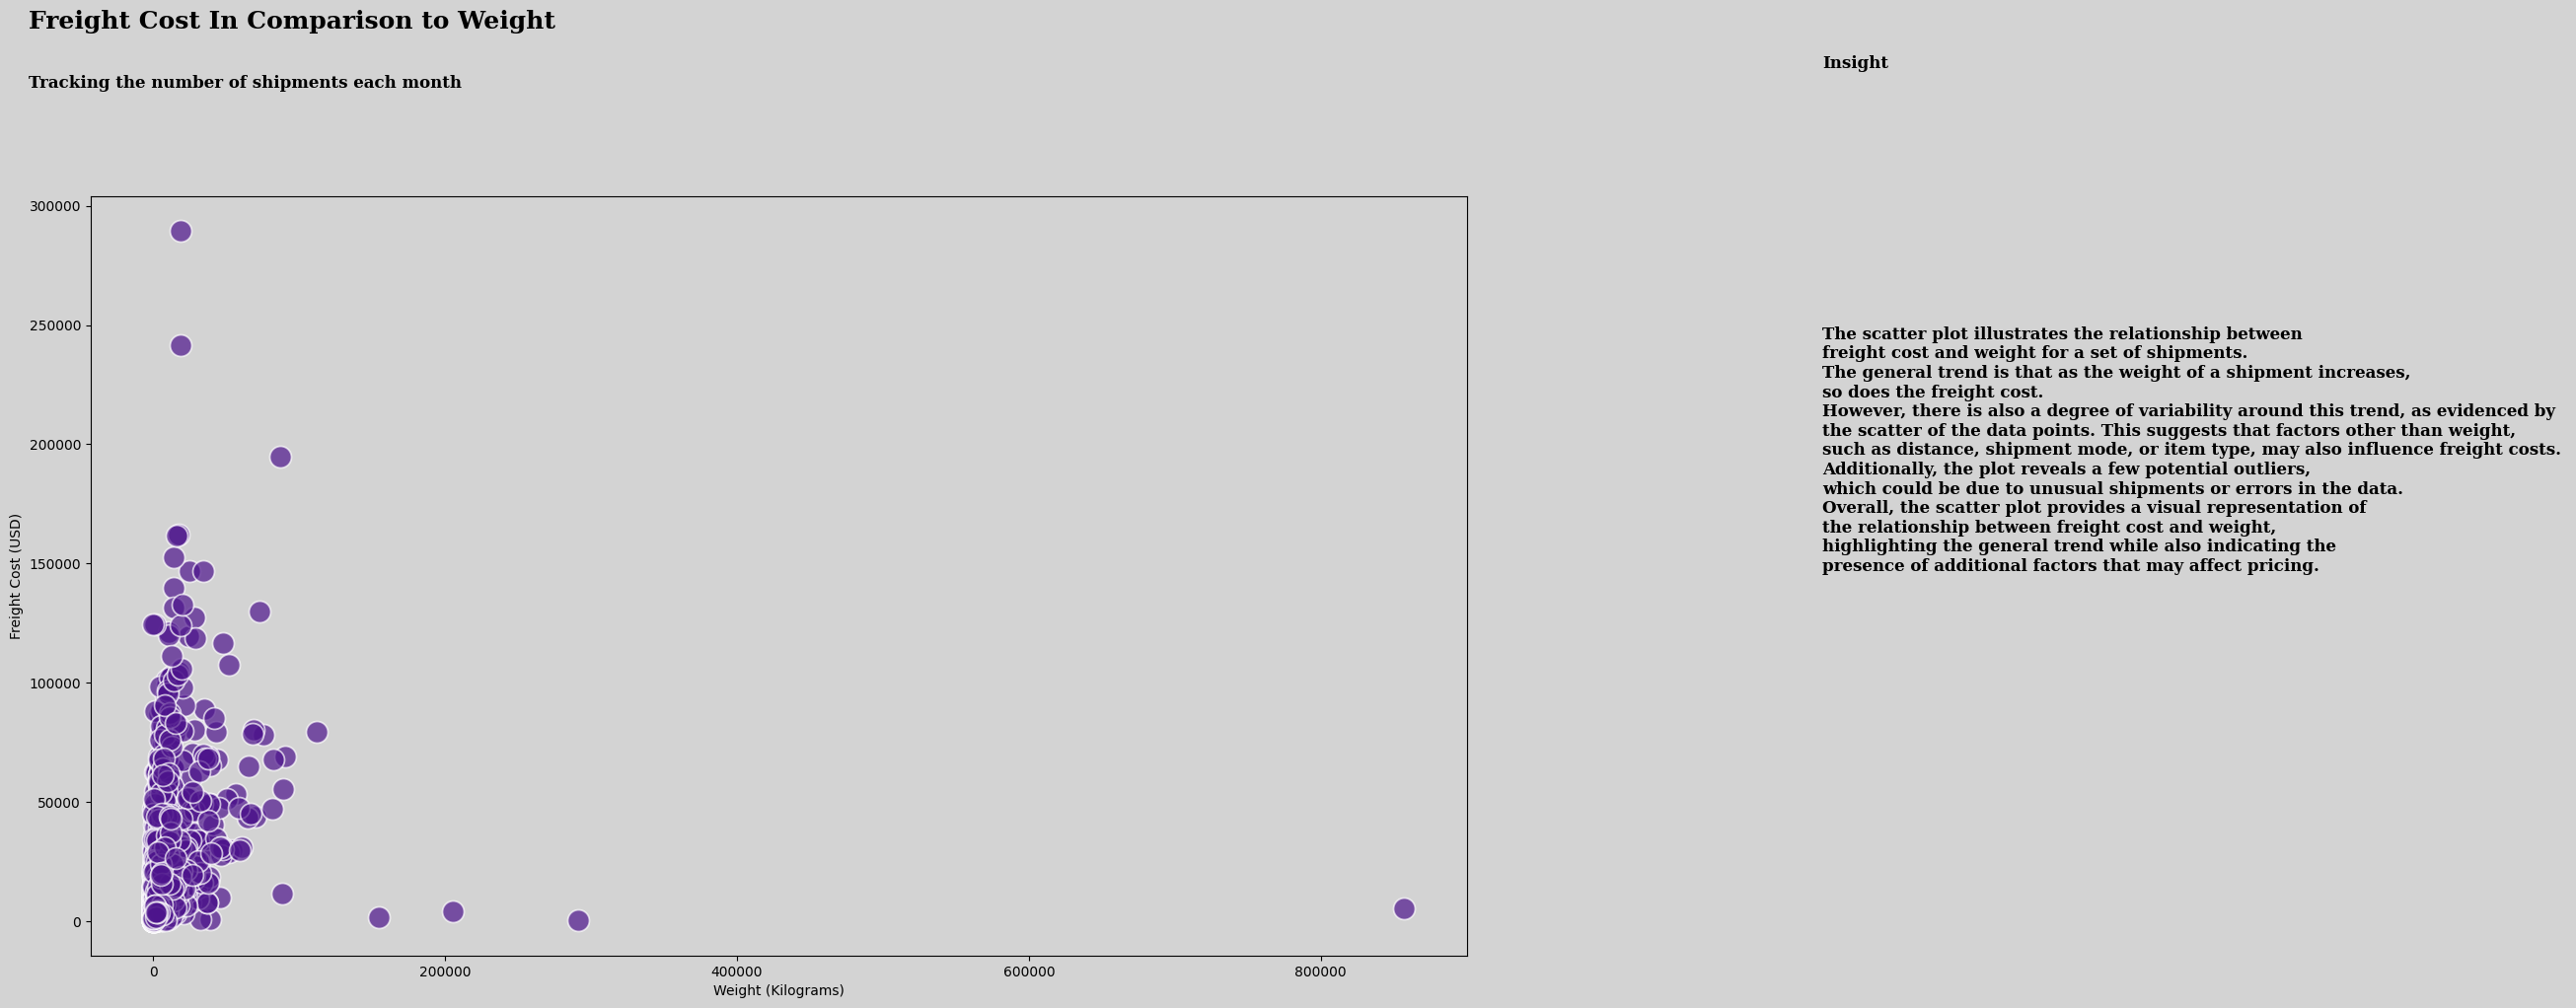

In [25]:
# Chart - 8 visualization code
fig, ax = plt.subplots(figsize=(18, 10))
sns.scatterplot(x = 'Weight (Kilograms)' , y = 'Freight Cost (USD)',data = fed_ex,s = 250, alpha = 0.7,color = '#4d148c' )

# Applying your defined chart styling
apply_chart_styling(ax=ax, fig=fig, title='Freight Cost In Comparison to Weight', subtitle='Tracking the number of shipments each month', insight_text='''The scatter plot illustrates the relationship between 
freight cost and weight for a set of shipments. 
The general trend is that as the weight of a shipment increases, 
so does the freight cost. 
However, there is also a degree of variability around this trend, as evidenced by 
the scatter of the data points. This suggests that factors other than weight, 
such as distance, shipment mode, or item type, may also influence freight costs. 
Additionally, the plot reveals a few potential outliers, 
which could be due to unusual shipments or errors in the data.
Overall, the scatter plot provides a visual representation of 
the relationship between freight cost and weight, 
highlighting the general trend while also indicating the 
presence of additional factors that may affect pricing.''')

# Tight layout for better spacing
plt.tight_layout()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'logo.png'

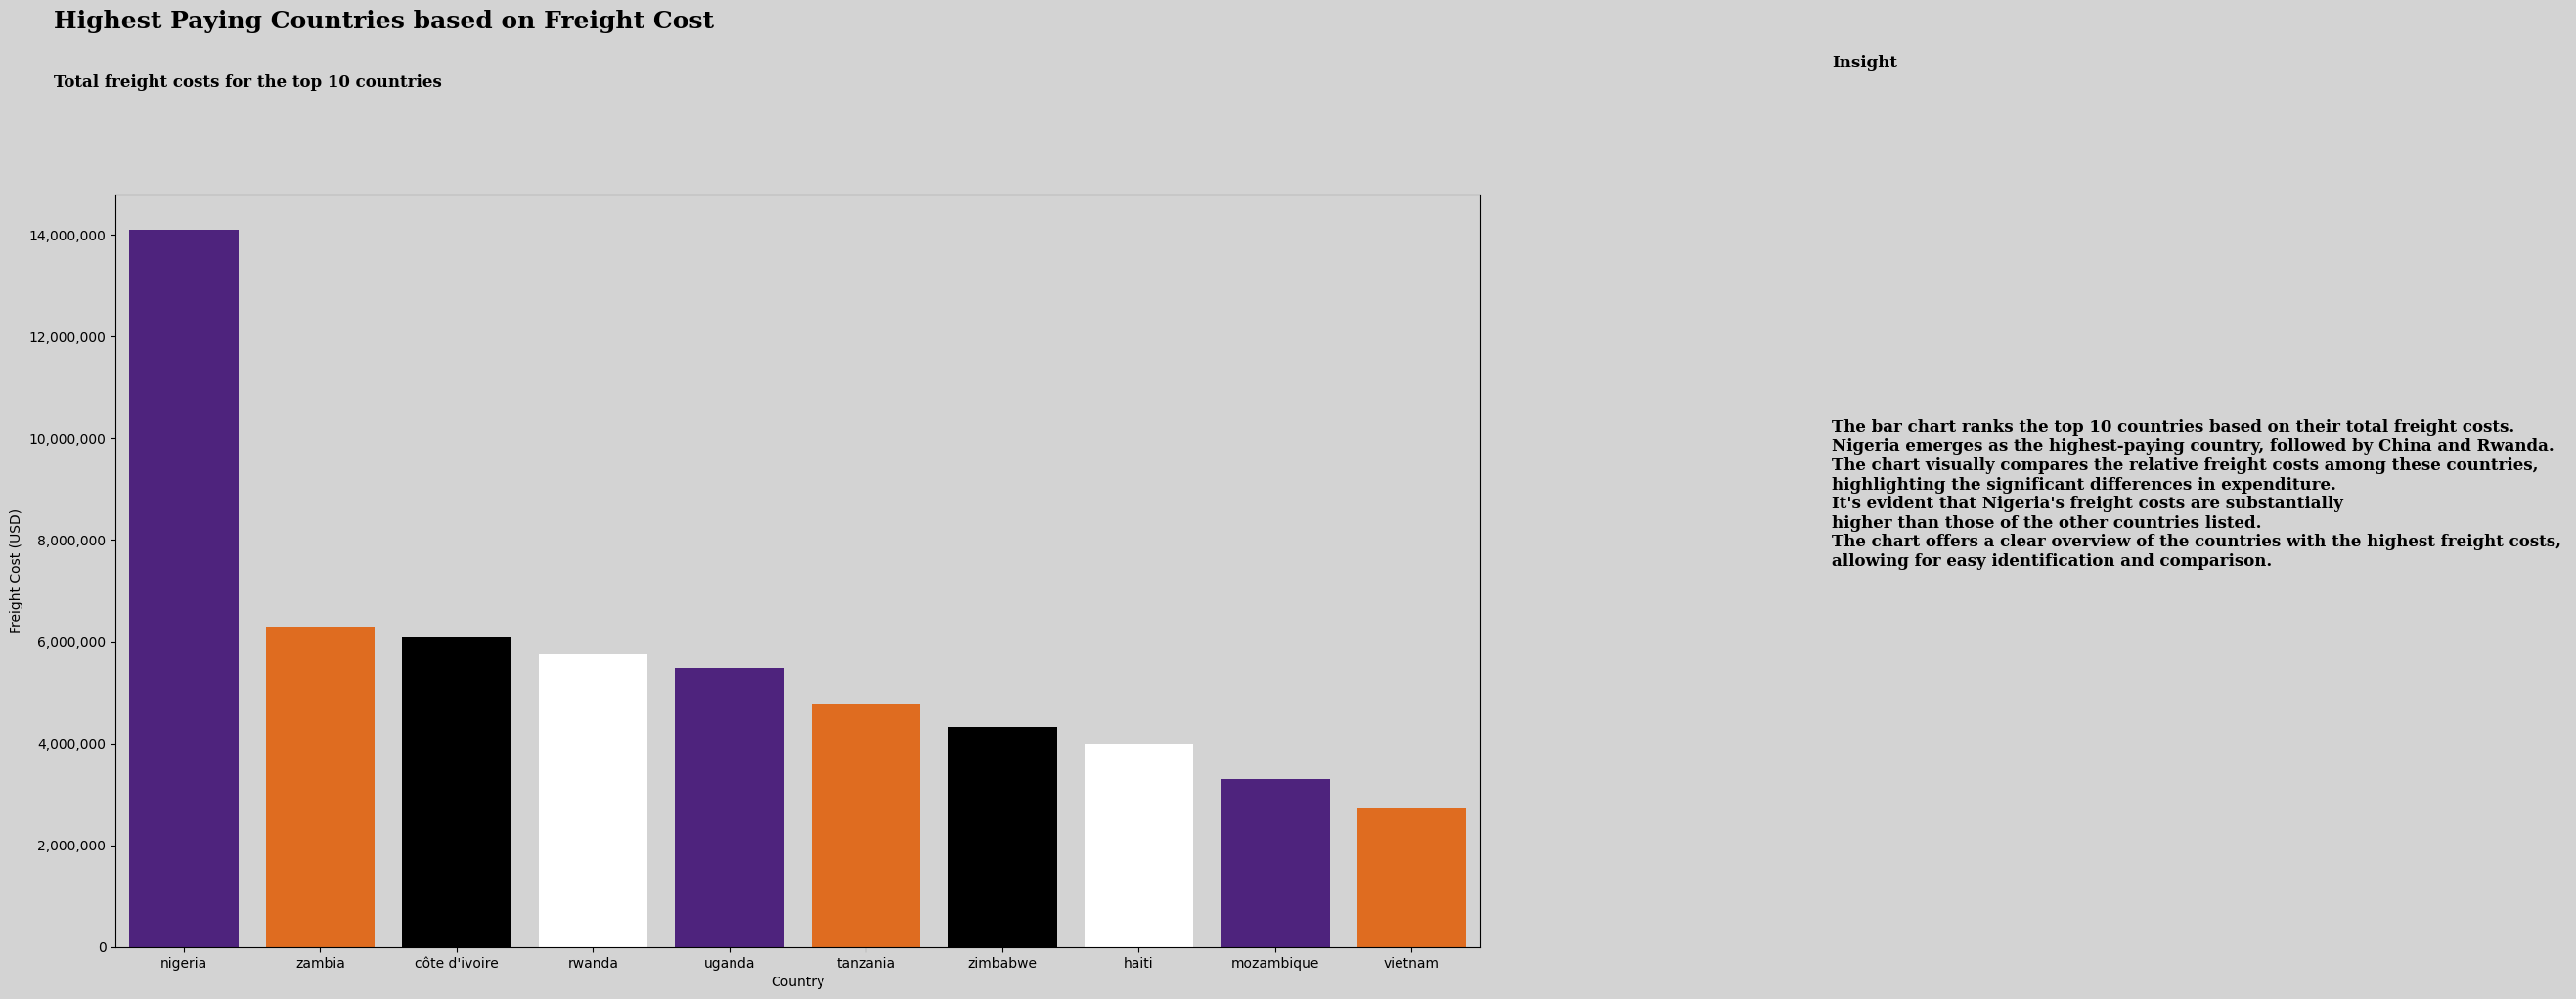

In [26]:
# Calculate total freight cost per country

fed_ex['Freight Cost (USD)'] = fed_ex['Freight Cost (USD)'].fillna(0)

fed_ex['Freight Cost (USD)'] = np.where(np.isfinite(fed_ex['Freight Cost (USD)']), 
                                        fed_ex['Freight Cost (USD)'], 0)

fed_ex['Freight Cost (USD)'] = fed_ex['Freight Cost (USD)'].astype(int)

top_10_countries = fed_ex.groupby('Country')['Freight Cost (USD)'].sum().nlargest(10).reset_index()

# Create bar plot
fig, ax = plt.subplots(1, 1, figsize=(18, 10))

# Bar plot of top 10 countries by freight cost
sns.barplot(x='Country', y='Freight Cost (USD)', data=top_10_countries, palette=palette, ax=ax)
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

# Apply your defined chart styling
apply_chart_styling(ax=ax, fig=fig, title='Highest Paying Countries based on Freight Cost', subtitle='Total freight costs for the top 10 countries', insight_text='''The bar chart ranks the top 10 countries based on their total freight costs. 
Nigeria emerges as the highest-paying country, followed by China and Rwanda. 
The chart visually compares the relative freight costs among these countries, 
highlighting the significant differences in expenditure. 
It's evident that Nigeria's freight costs are substantially 
higher than those of the other countries listed. 
The chart offers a clear overview of the countries with the highest freight costs, 
allowing for easy identification and comparison.''')

# Tight layout for better spacing
plt.tight_layout()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'logo.png'

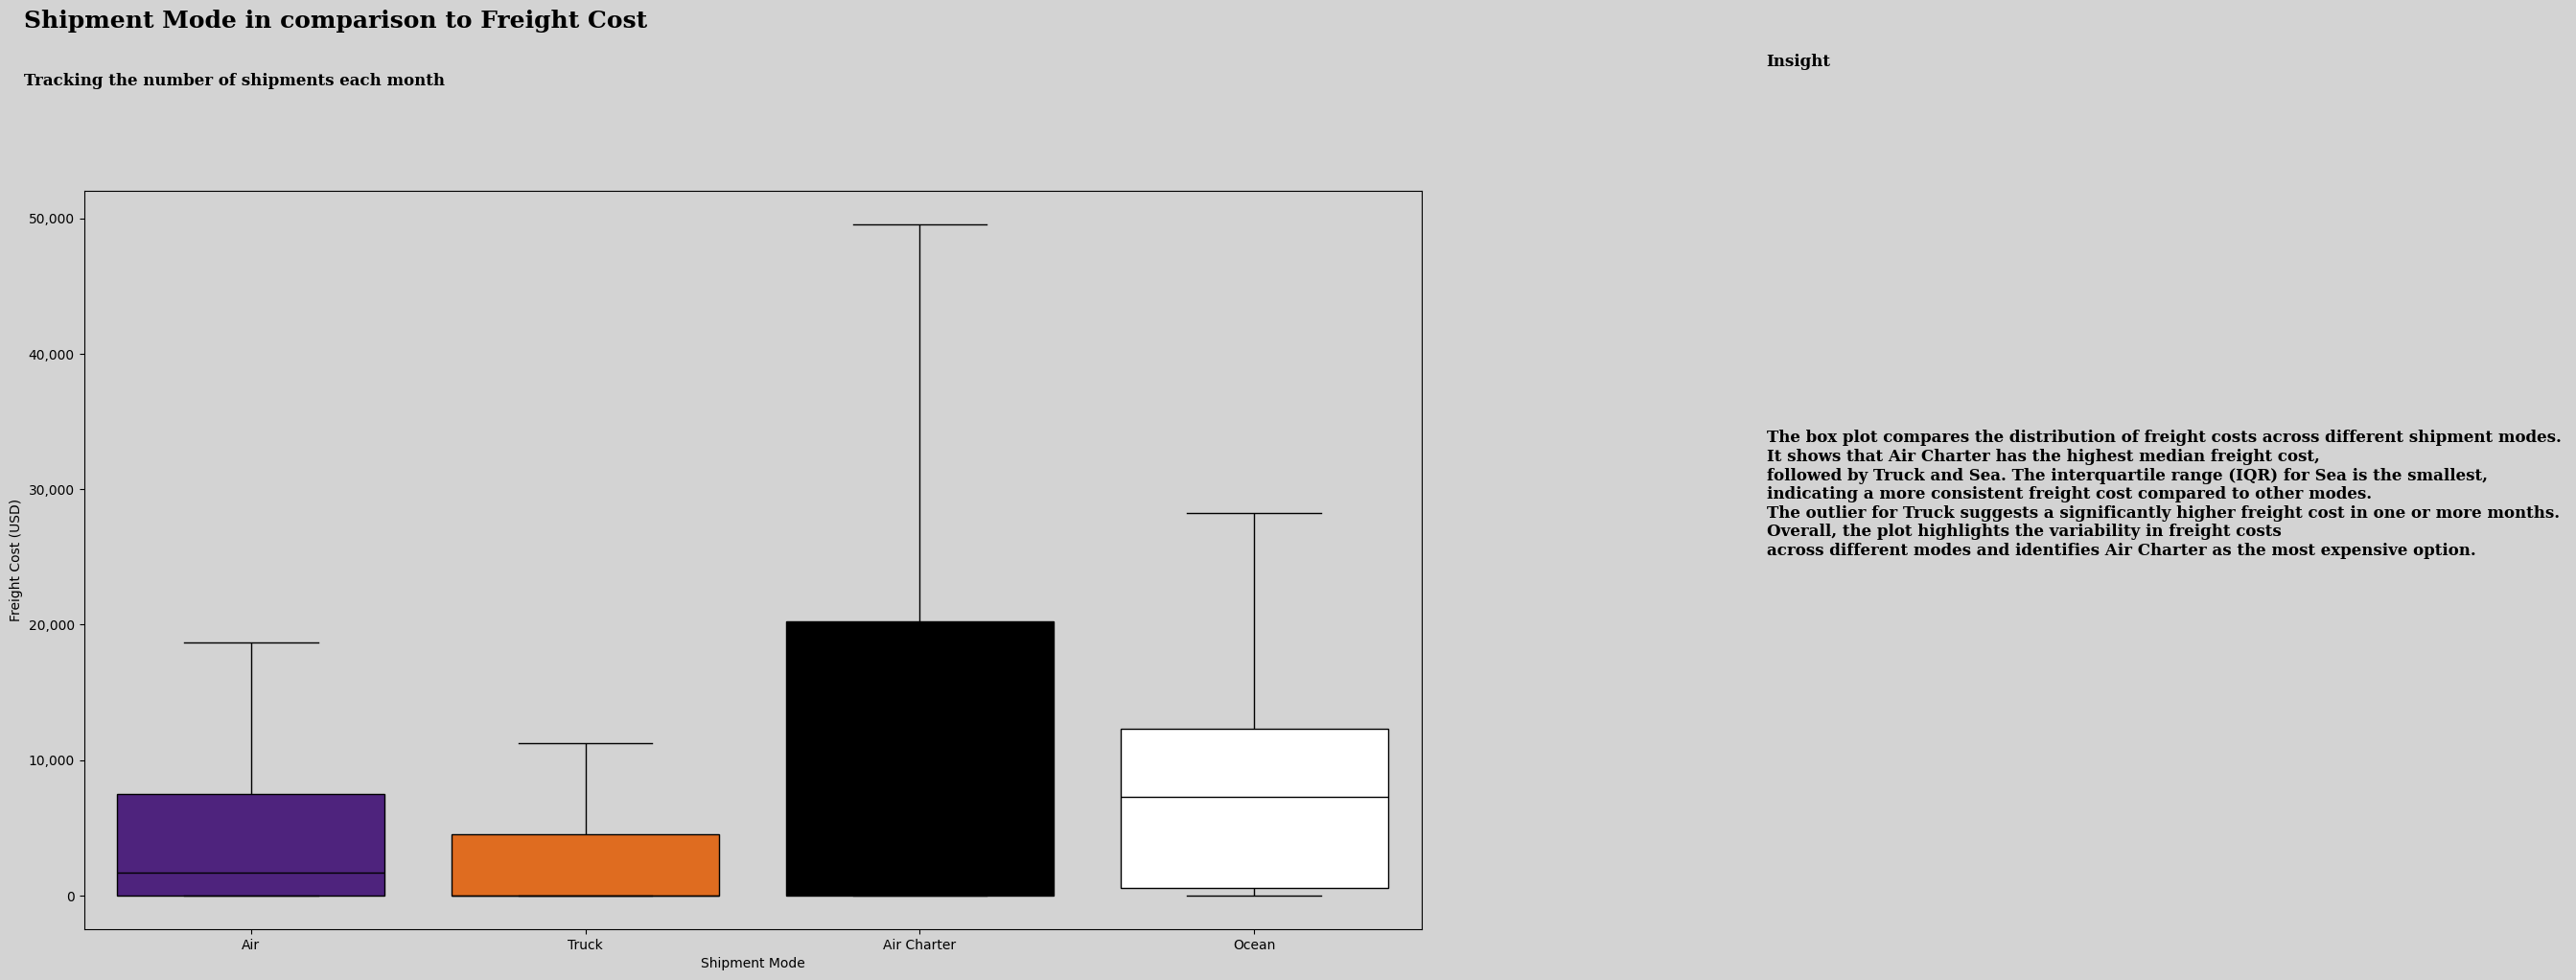

In [27]:
fig, ax = plt.subplots(figsize=(18, 10))
sns.boxplot(x = 'Shipment Mode' , y = 'Freight Cost (USD)',data = fed_ex,palette = palette,showfliers = False)
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
# Applying your defined chart styling
apply_chart_styling(ax=ax, fig=fig, title='Shipment Mode in comparison to Freight Cost', subtitle='Tracking the number of shipments each month', insight_text='''The box plot compares the distribution of freight costs across different shipment modes. 
It shows that Air Charter has the highest median freight cost, 
followed by Truck and Sea. The interquartile range (IQR) for Sea is the smallest, 
indicating a more consistent freight cost compared to other modes. 
The outlier for Truck suggests a significantly higher freight cost in one or more months. 
Overall, the plot highlights the variability in freight costs 
across different modes and identifies Air Charter as the most expensive option.''')

# Tight layout for better spacing
plt.tight_layout()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'logo.png'

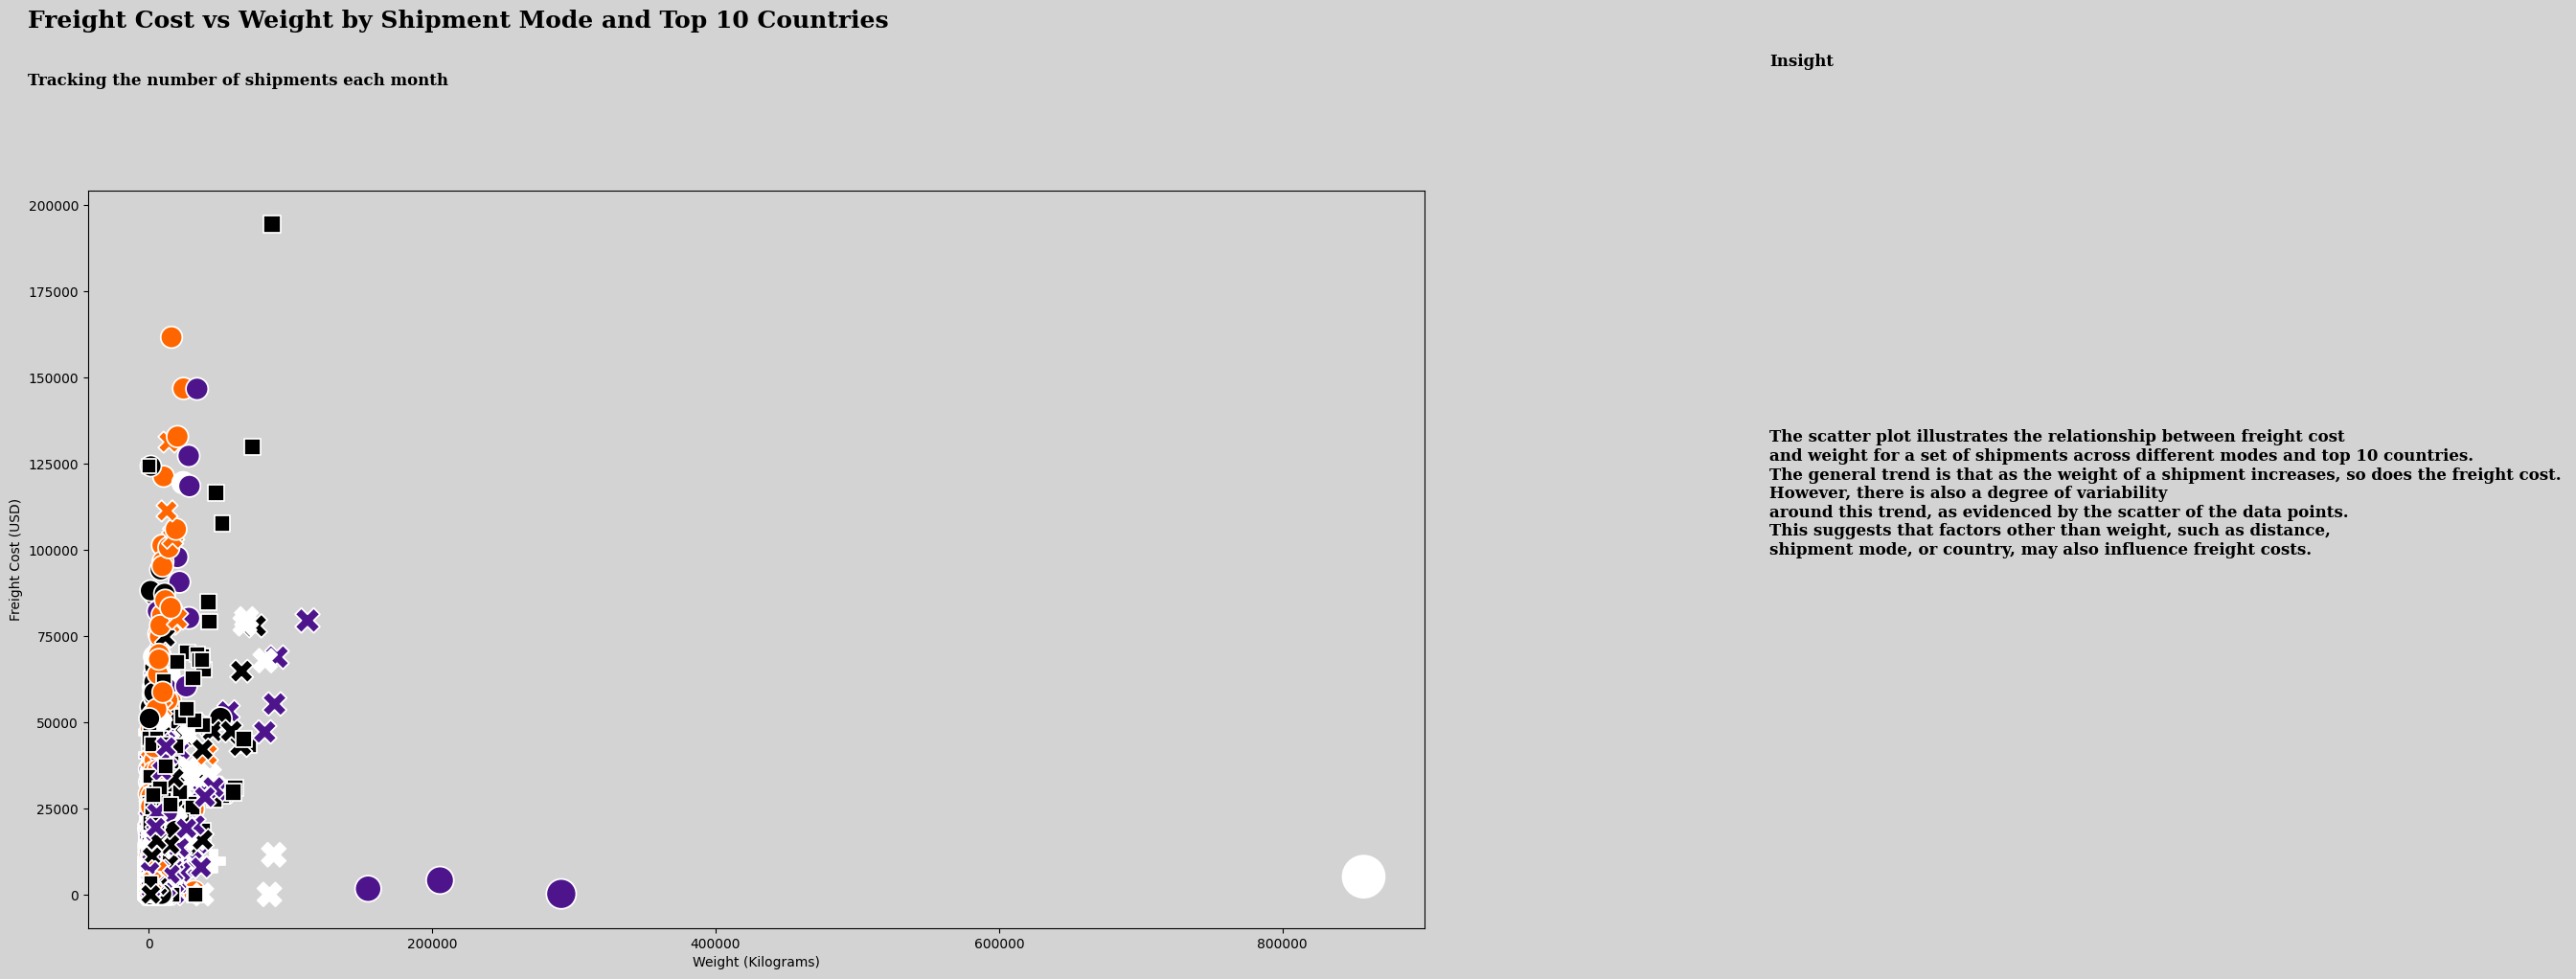

In [29]:
top_10_countries = fed_ex['Country'].value_counts().nlargest(10).index

top_10_data = fed_ex[fed_ex['Country'].isin(top_10_countries)]


fig, ax = plt.subplots(figsize=(18, 10))


sns.scatterplot(x='Weight (Kilograms)', y='Freight Cost (USD)', hue='Country',  size='Weight (Kilograms)',  style='Shipment Mode',  sizes=(250, 1000),  data=top_10_data,  palette=palette, ax=ax,legend = False)

# Add title and labels
apply_chart_styling(ax=ax, fig=fig, title='Freight Cost vs Weight by Shipment Mode and Top 10 Countries', subtitle='Tracking the number of shipments each month', insight_text='''The scatter plot illustrates the relationship between freight cost 
and weight for a set of shipments across different modes and top 10 countries. 
The general trend is that as the weight of a shipment increases, so does the freight cost. 
However, there is also a degree of variability 
around this trend, as evidenced by the scatter of the data points. 
This suggests that factors other than weight, such as distance, 
shipment mode, or country, may also influence freight costs.''')
plt.tight_layout()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'logo.png'

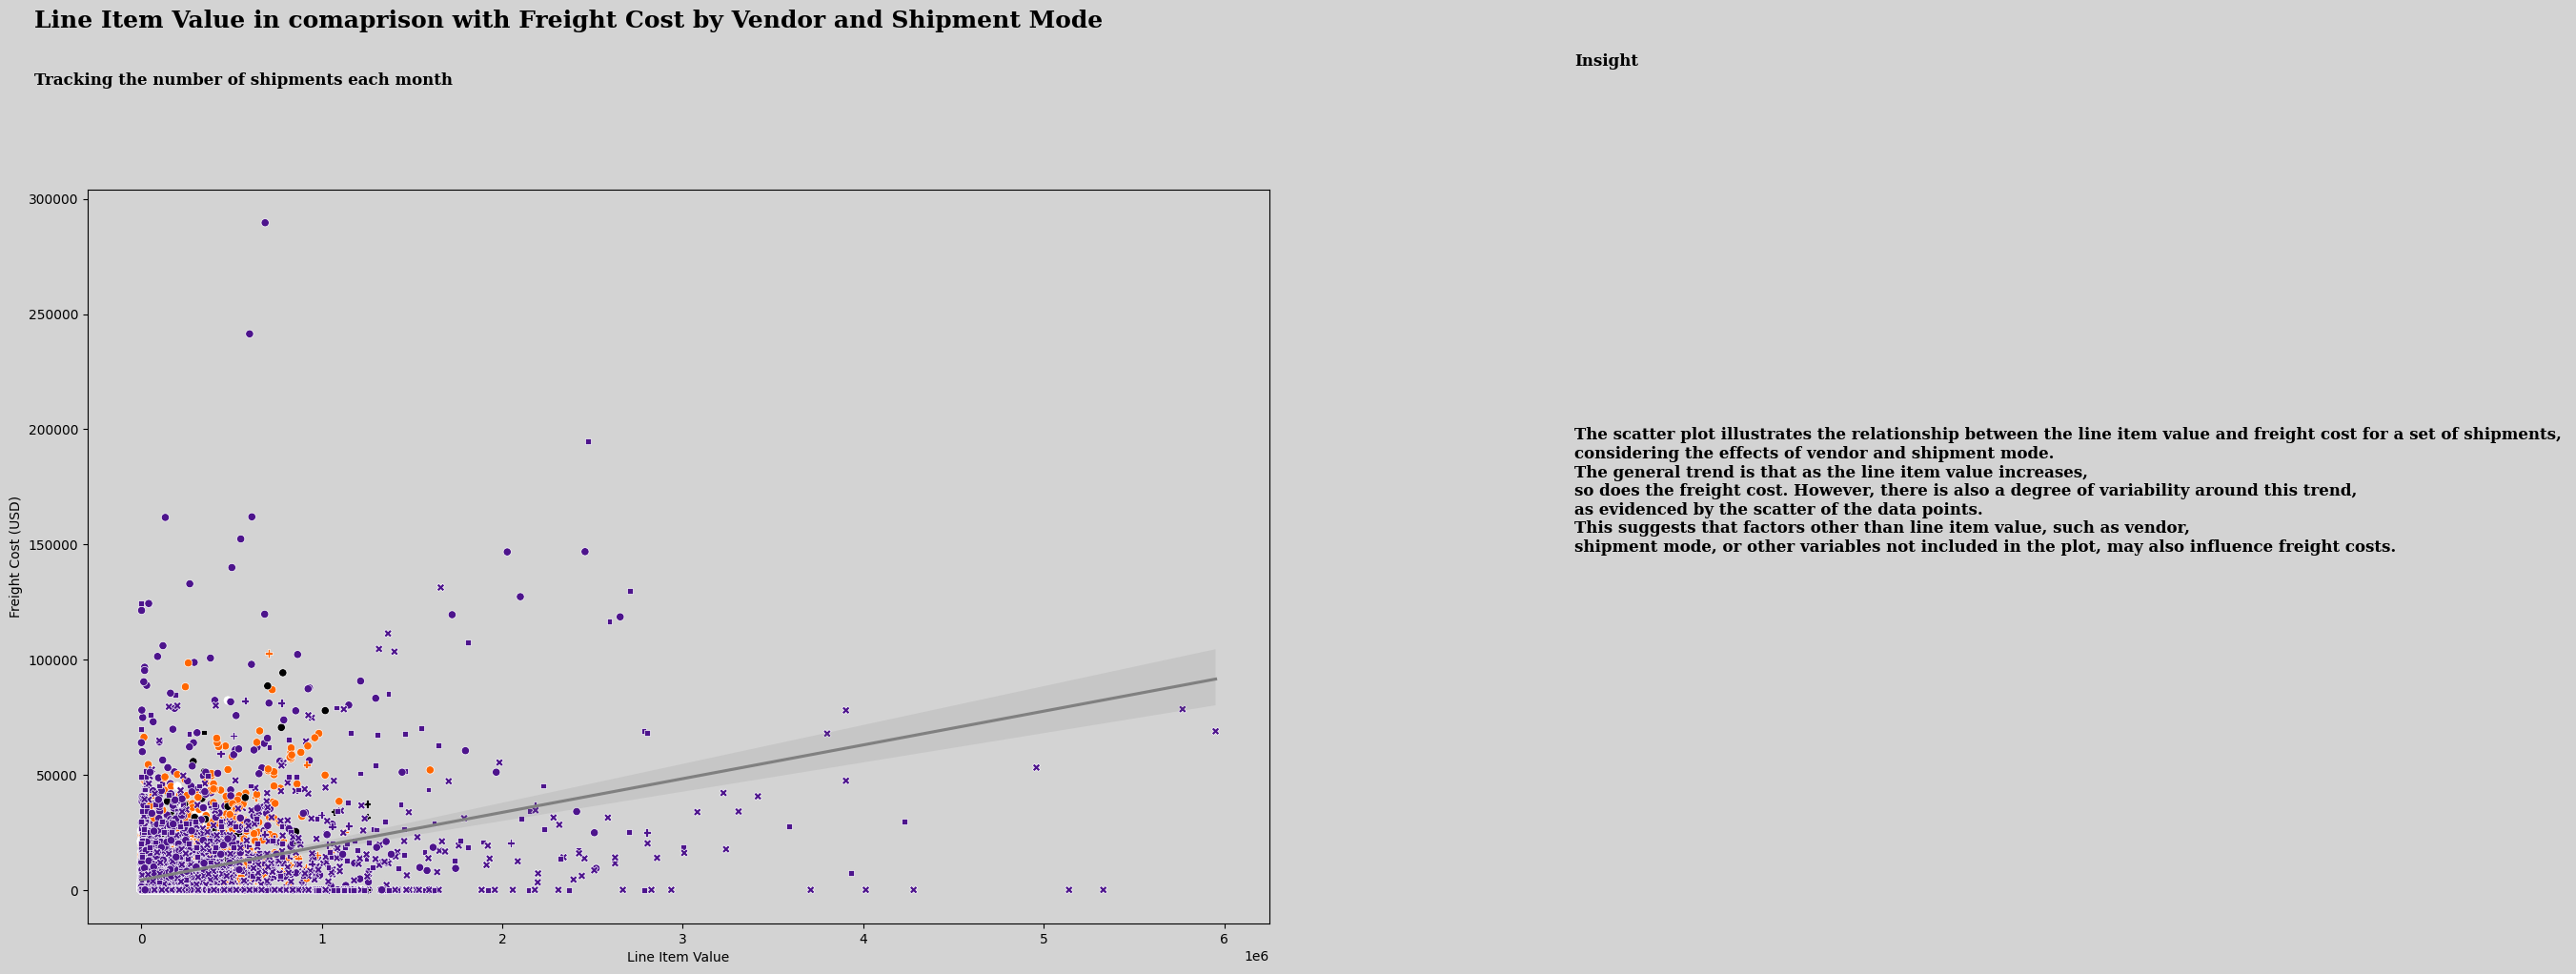

In [30]:
fig, ax = plt.subplots(figsize=(16, 10))

# Scatter plot
sns.scatterplot(
    x='Line Item Value', 
    y='Freight Cost (USD)', 
    hue='Vendor',  
    style='Shipment Mode',   
    data=fed_ex,  
    ax=ax,
    palette=palette,
    legend=False  
)


sns.regplot(
    x='Line Item Value', 
    y='Freight Cost (USD)', 
    data=fed_ex, 
    scatter=False, 
    ax=ax, 
    color='gray',
)

# Apply chart styling
apply_chart_styling(ax=ax, fig=fig, title='Line Item Value in comaprison with Freight Cost by Vendor and Shipment Mode', subtitle='Tracking the number of shipments each month', insight_text='''The scatter plot illustrates the relationship between the line item value and freight cost for a set of shipments, 
considering the effects of vendor and shipment mode. 
The general trend is that as the line item value increases, 
so does the freight cost. However, there is also a degree of variability around this trend, 
as evidenced by the scatter of the data points. 
This suggests that factors other than line item value, such as vendor, 
shipment mode, or other variables not included in the plot, may also influence freight costs.''')

# Display the plot
plt.tight_layout()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'logo.png'

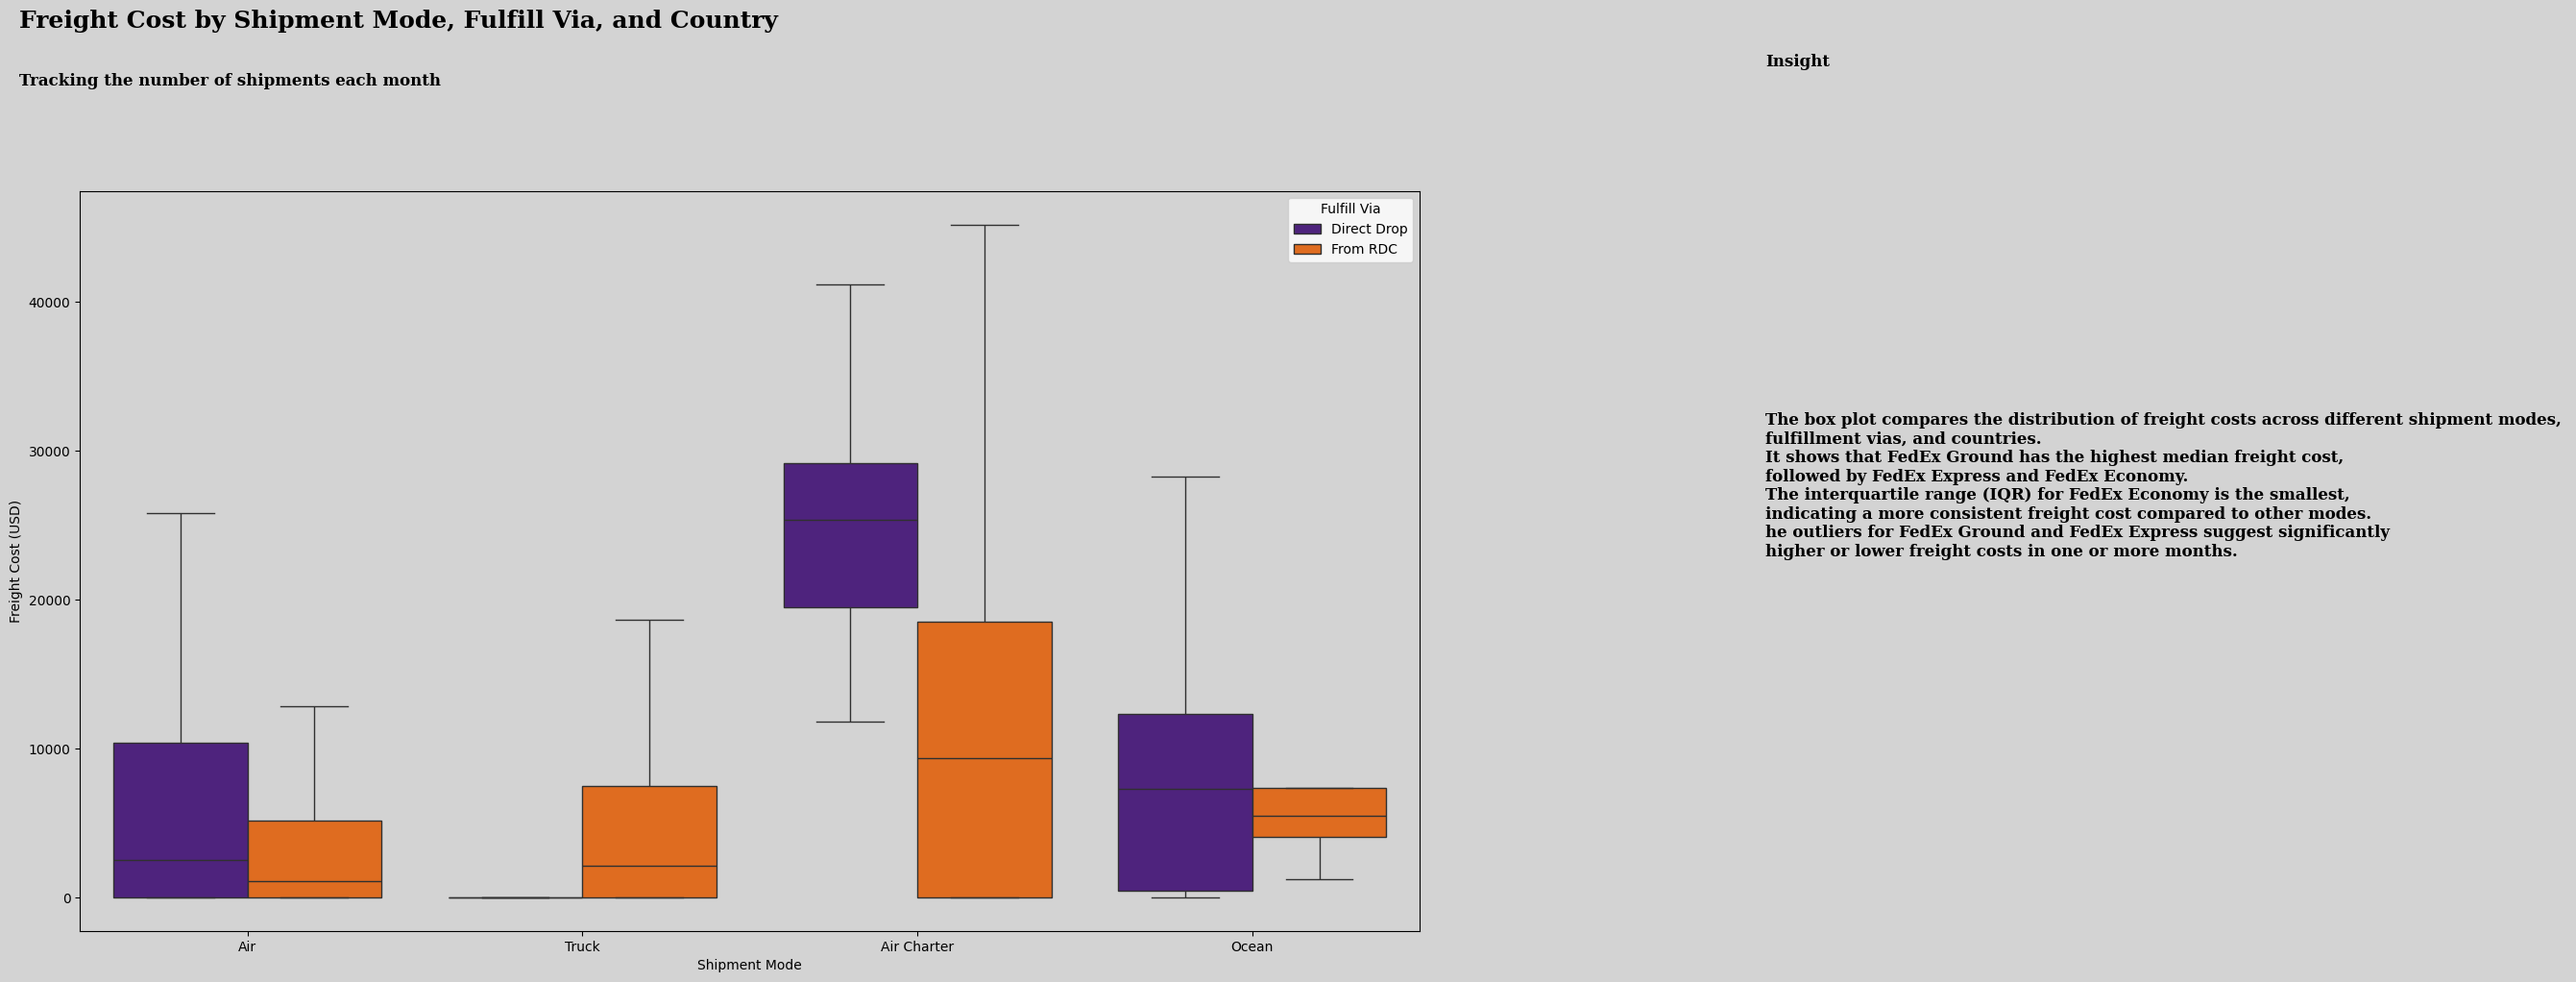

In [31]:
# Boxplot for freight cost by shipment mode, fulfill method, and country
fig,ax = plt.subplots(1,1,figsize = (18,10))
sns.boxplot(
    x='Shipment Mode', 
    y='Freight Cost (USD)', 
    hue='Fulfill Via',  # Add segmentation by fulfill method
    data=fed_ex,  # Replace with your dataset
    ax=ax,
    palette=palette,
    showfliers = False
)

apply_chart_styling(ax=ax, fig=fig, title='Freight Cost by Shipment Mode, Fulfill Via, and Country', subtitle='Tracking the number of shipments each month', insight_text='''The box plot compares the distribution of freight costs across different shipment modes, 
fulfillment vias, and countries. 
It shows that FedEx Ground has the highest median freight cost, 
followed by FedEx Express and FedEx Economy. 
The interquartile range (IQR) for FedEx Economy is the smallest, 
indicating a more consistent freight cost compared to other modes. 
he outliers for FedEx Ground and FedEx Express suggest significantly 
higher or lower freight costs in one or more months.''')

# Display the plot
plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'logo.png'

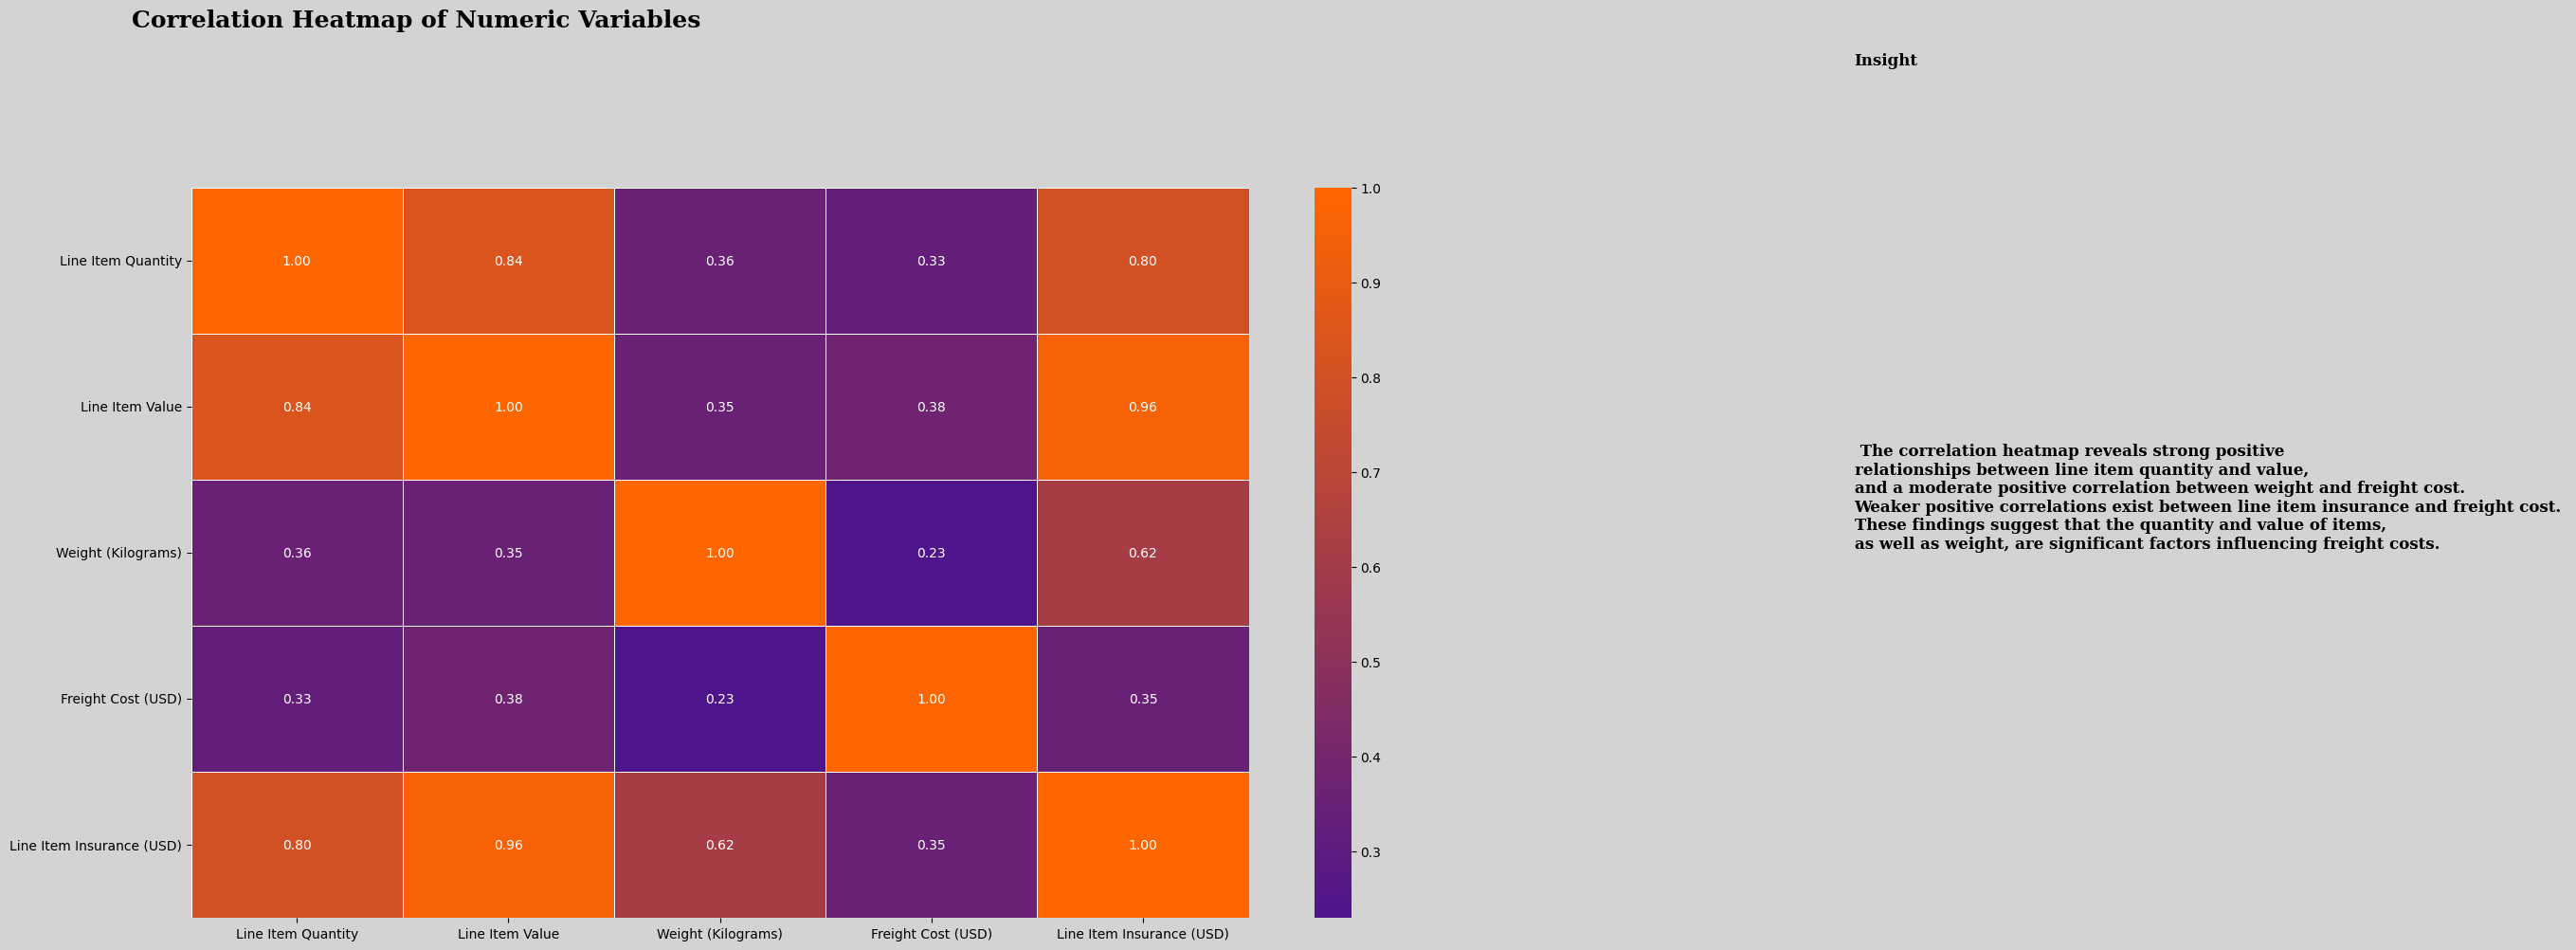

In [32]:
# Define the colors in hex
colors = ['#4d148c', '#ff6600']

# Create the colormap
custom_cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', colors)

correlation_matrix = fed_ex[numeric_columns].corr()

# Create a heatmap
fig,ax = plt.subplots(figsize=(18, 10))
sns.heatmap(correlation_matrix, annot=True, cmap= custom_cmap, fmt='.2f', linewidths=0.5)
apply_chart_styling(ax = ax ,fig = fig , title = 'Correlation Heatmap of Numeric Variables',subtitle = '',insight_text = ''' The correlation heatmap reveals strong positive 
relationships between line item quantity and value, 
and a moderate positive correlation between weight and freight cost. 
Weaker positive correlations exist between line item insurance and freight cost. 
These findings suggest that the quantity and value of items, 
as well as weight, are significant factors influencing freight costs.''')
plt.tight_layout()
plt.show()

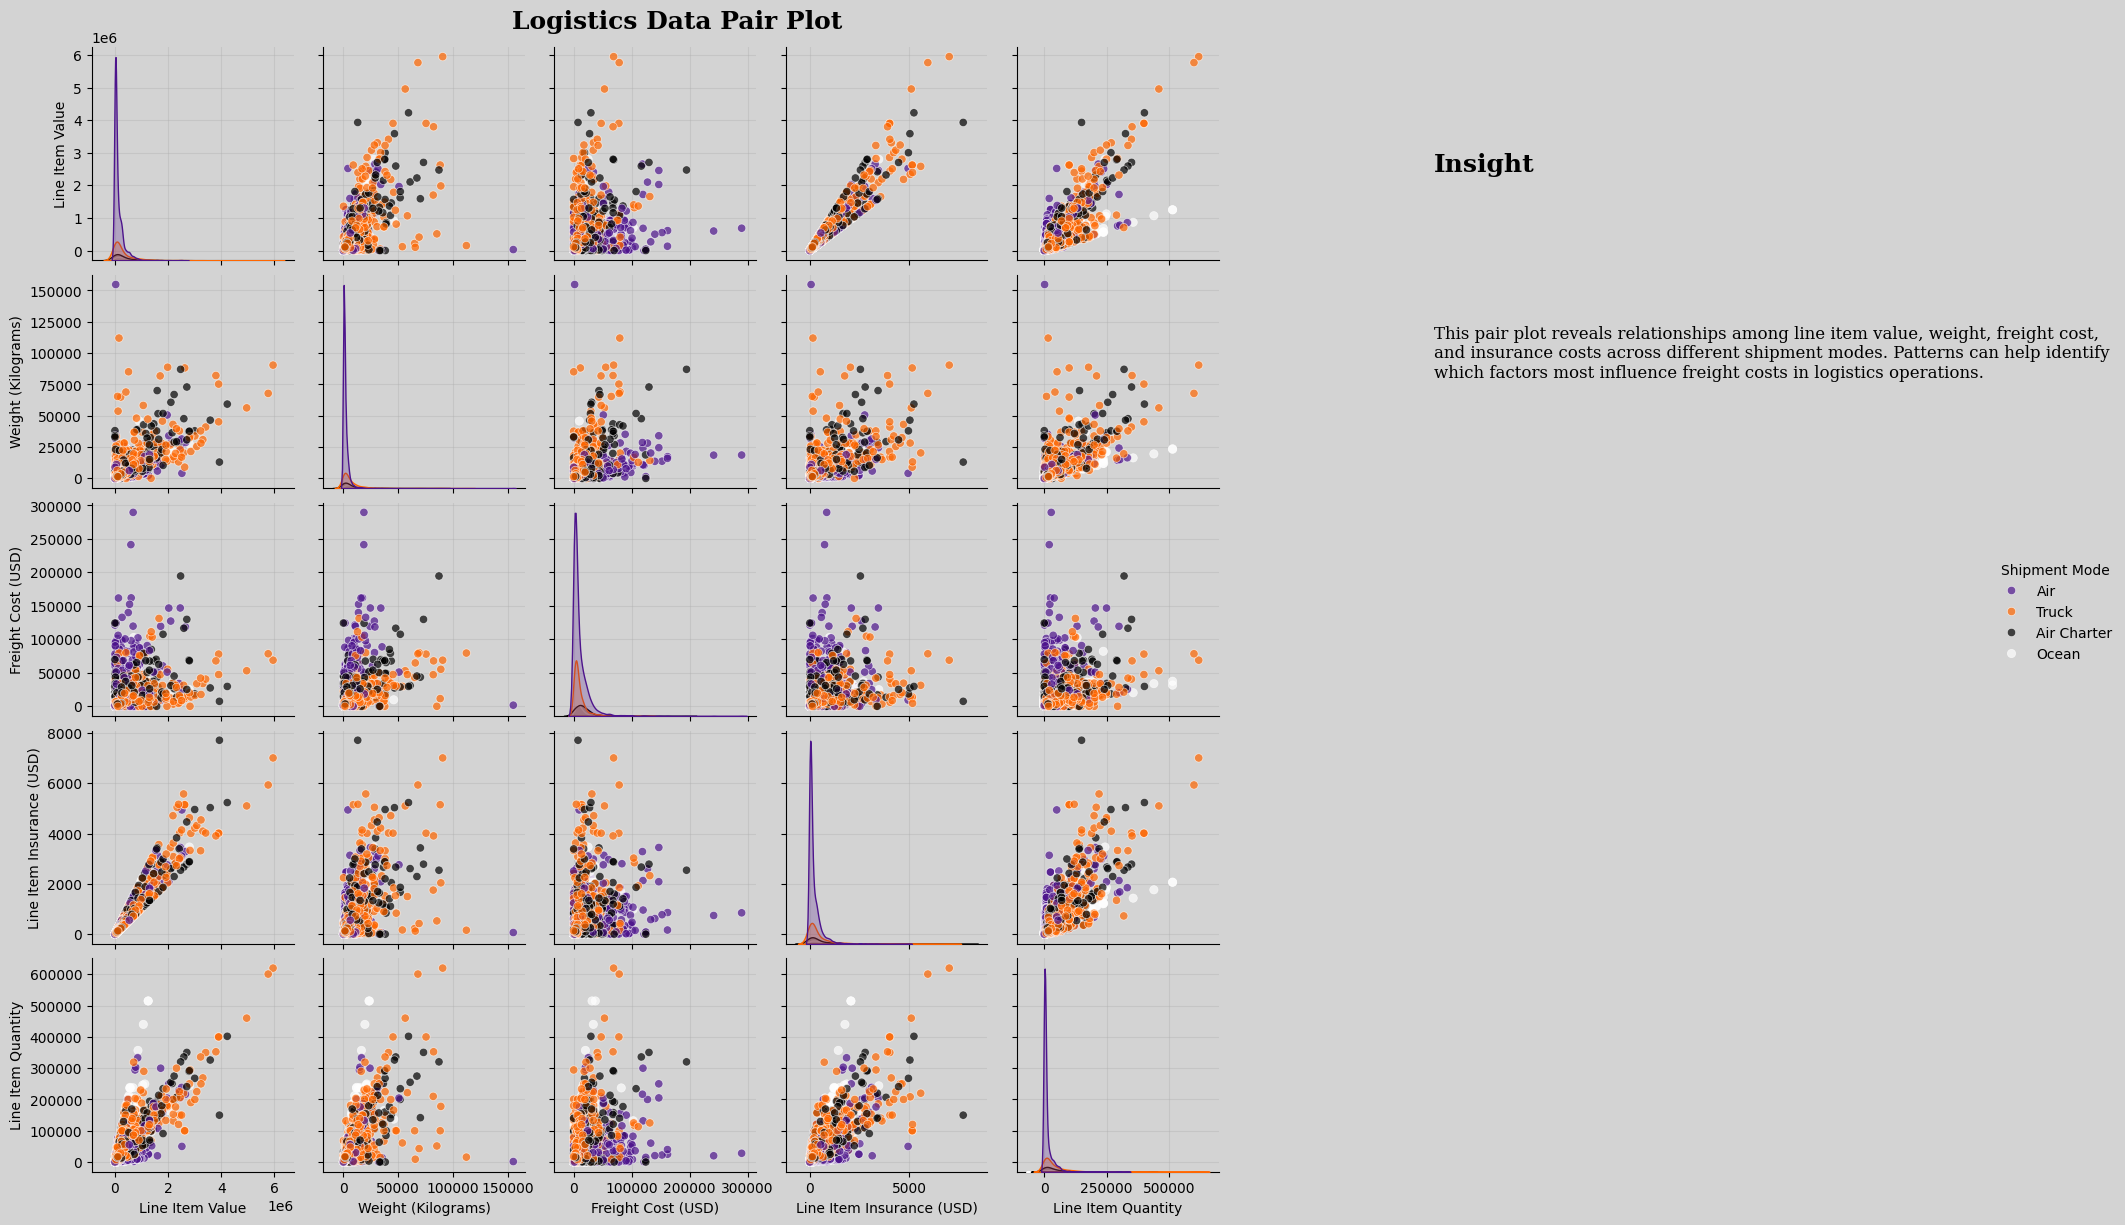

<Figure size 640x480 with 0 Axes>

In [33]:
numeric_columns = ['Line Item Value', 'Weight (Kilograms)', 'Freight Cost (USD)', 'Line Item Insurance (USD)', 'Line Item Quantity']

# Drop rows with missing values in the selected columns
df_pairplot = fed_ex[numeric_columns + ['Shipment Mode']].dropna()


# Create pair plot with shipment mode as hue
fig = sns.pairplot(df_pairplot, 
                   hue='Shipment Mode',  
                   palette=palette, 
                   diag_kind='kde',  # Kernel density estimate on the diagonal
                   plot_kws={'alpha': 0.7})  # Transparency of points

plt.figure().set_facecolor('#D3D3D3')

# Customize the appearance of each subplot
for ax in fig.axes.flatten():
    ax.set_facecolor('#D3D3D3')  
    ax.grid(axis='both', linestyle='-', alpha=0.4)  # Light gridlines
    ax.set_axisbelow(True)

# Add a title to the entire figure
fig.fig.suptitle('Logistics Data Pair Plot', fontsize=18, fontweight='bold', fontfamily='serif')
fig.fig.subplots_adjust(top=0.95)  

# Add custom insight text outside the plot
fig.fig.text(1.05, 0.85, 'Insight', fontsize=18, fontweight='bold', fontfamily='serif')
fig.fig.text(1.05, 0.67, '''
This pair plot reveals relationships among line item value, weight, freight cost,
and insurance costs across different shipment modes. Patterns can help identify 
which factors most influence freight costs in logistics operations.
''', fontsize=12, fontfamily='serif')

fig.fig.patch.set_facecolor('#D3D3D3')
# Display the plot
plt.show()